
# Evaluation Explorer Notebook

This notebook provides exploratory data analysis (EDA) for the `full_evaluation_results.csv` file.

It includes:
- Dataset overview
- Policy comparison plots
- Time dynamics (defender & attacker)
- Action distributions
- Robustness across replicates

Adjust paths and parameters as needed.


In [2]:

import os
import ast
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")

# Path to your CSV file
csv_path = "/home/chris/Desktop/bayesian-security-games/games/satellite_game/results/full_evaluation_results_new.csv"

df = pd.read_csv(csv_path)
print(df.shape)
df.head(10)


(48000, 26)


config_file               policy  replicate        seed  \
0  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          0  2111243565   
1  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          1  4131607270   
2  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          2  2646667378   
3  ACRL_beta_level_0_instance_0               H2S-H1          0  4216514892   
4  ACRL_beta_level_0_instance_0               H2S-H1          1  2264878765   
5  ACRL_beta_level_0_instance_0               H2S-H1          2  3461678326   
6  ACRL_beta_level_0_instance_0                  AMG          0  1220040996   
7  ACRL_beta_level_0_instance_0                  AMG          1  1219673808   
8  ACRL_beta_level_0_instance_0                  AMG          2   951105809   
9  ACRL_beta_level_0_instance_0                  ADP          0  3314530254   

   avg_comp_time  atk_avg_util  atk_tot_util  def_avg_util  def_tot_util  \
0       0.010557   -118.325880 -11832.588000   -290.488340  -29048.83400   
1       0.000431    -29.825882  -2982.588100    -73.218994   -7321.89940   
2       0.000406     -0.316314    -31.631447     -6.358504    -635.85040   
3       0.028704    -81.674126  -8167.412600   -225.862350  -22586.23400   
4       0.003603    -29.614650  -2961.465000    -81.134090   -8113.40870   
5       0.003612    -11.219379  -1121.938000    -26.234255   -2623.42550   
6       0.020084    -12.805292  -1280.529200     -2.454995    -245.49951   
7       0.000966    -31.371077  -3137.107700    -66.016846   -6601.68460   
8       0.000948    -26.428339  -2642.834000    -50.060380   -5006.03800   
9       0.002069   -137.490050 -13749.006000   -336.723600  -33672.36000   

      atk_action_dist  ...                                      atk_win_means  \
0  [0.23, 0.54, 0.23]  ...  [-159.1425323486328, -267.8253479003906, -299....   
1  [0.22, 0.46, 0.32]  ...  [-157.13363647460938, -68.18313598632812, -47....   
2     [0.1, 0.8, 0.1]  ...  [-104.0601577758789, -50.21166229248047, -14.3...   
3  [0.29, 0.42, 0.29]  ...  [-144.510986328125, -173.3134002685547, -149.2...   
4  [0.16, 0.68, 0.16]  ...  [-136.4159393310547, -118.21354675292969, -86....   
5  [0.12, 0.77, 0.11]  ...  [-132.78515625, -76.87191009521484, -39.013683...   
6   [0.16, 0.64, 0.2]  ...  [-125.25016021728516, -53.39653778076172, -23....   
7  [0.56, 0.22, 0.22]  ...  [-150.9978485107422, -135.24807739257812, -71....   
8  [0.18, 0.59, 0.23]  ...  [-147.921142578125, -118.5748291015625, -58.65...   
9  [0.33, 0.34, 0.33]  ...  [-209.977294921875, -236.86526489257812, -204....   

                                       def_win_means  \
0  [-409.28363037109375, -597.7529296875, -688.33...   
1  [-368.11700439453125, -179.70892333984375, -11...   
2  [-259.4703369140625, -151.4608612060547, -79.7...   
3  [-387.2706298828125, -419.37860107421875, -378...   
4  [-368.935546875, -265.59844970703125, -230.248...   
5  [-352.9593200683594, -161.8325653076172, -128....   
6  [-338.6138916015625, -130.8704071044922, -86.8...   
7  [-353.57086181640625, -310.5093994140625, -162...   
8  [-375.8822937011719, -244.2451171875, -140.038...   
9  [-458.6441955566406, -511.78961181640625, -503...   

                                       adv_win_means  \
0  [-250.14109802246094, -329.9275817871094, -388...   
1  [-210.98336791992188, -111.52578735351562, -65...   
2  [-155.41018676757812, -101.24919891357422, -65...   
3  [-242.7596435546875, -246.06520080566406, -229...   
4  [-232.5196075439453, -147.38490295410156, -143...   
5  [-220.17416381835938, -84.96065521240234, -89....   
6  [-213.36373901367188, -77.47386932373047, -63....   
7  [-202.57301330566406, -175.26132202148438, -90...   
8  [-227.96115112304688, -125.6702880859375, -81....   
9  [-248.66690063476562, -274.9243469238281, -298...   

                                    attacker_actions  \
0  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
1  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
2  [1 0 2 1 0 2 1 0

In [3]:

def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception:
            return val
    return val

def parse_config(config_str):
    if not isinstance(config_str, str):
        return pd.Series({"opponent_policy": None, "beta_level": None, "instance_number": None})
    parts = config_str.split("_")
    opp = parts[0] if len(parts) > 0 else None
    beta, inst = None, None
    ints = [int(p) for p in parts if p.isdigit()]
    if len(ints) >= 1:
        beta = ints[0]
    if len(ints) >= 2:
        inst = ints[1]
    return pd.Series({"opponent_policy": opp, "beta_level": beta, "instance_number": inst})

def ci95(series: pd.Series):
    x = series.dropna().values
    n = len(x)
    if n == 0:
        return np.nan
    m = x.mean()
    s = x.std(ddof=1) if n > 1 else 0.0
    hw = 1.96 * s / np.sqrt(n) if n > 1 else 0.0
    return m, hw

# Parse config
if "config_file" in df.columns:
    parsed = df["config_file"].apply(parse_config)
    df = pd.concat([df, parsed], axis=1)

# Convert numerics
numeric_cols = ["avg_comp_time", "atk_avg_util", "atk_tot_util", "def_avg_util", "def_tot_util",
                "time_in_def_bounds", "time_in_atk_bounds", "window_size"]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")


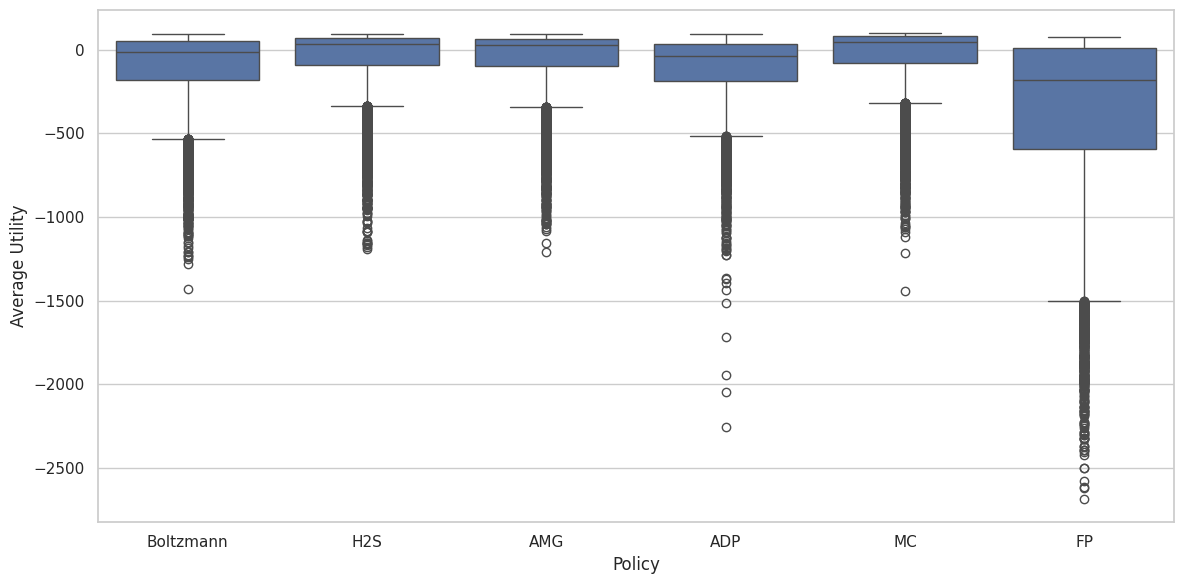

In [3]:

# Define renaming map
rename_policies = {
    "Boltzmann_reduced_k": "Boltzmann",
    "H2S-H1": "H2S",
    "AMG": "AMG",
    "ADP": "ADP",
    "MC": "MC",
    "FP": "FP"
}

# Make a new column with display names
df["policy_display"] = df["policy"].map(rename_policies).fillna(df["policy"])

# Plot with the new column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="policy_display", y="def_avg_util", showfliers=True)
plt.xlabel("Policy")  # update x-axis label
plt.ylabel("Average Utility")
plt.tight_layout()
plt.savefig("def_util_boxplot_outliers.png")
plt.show()





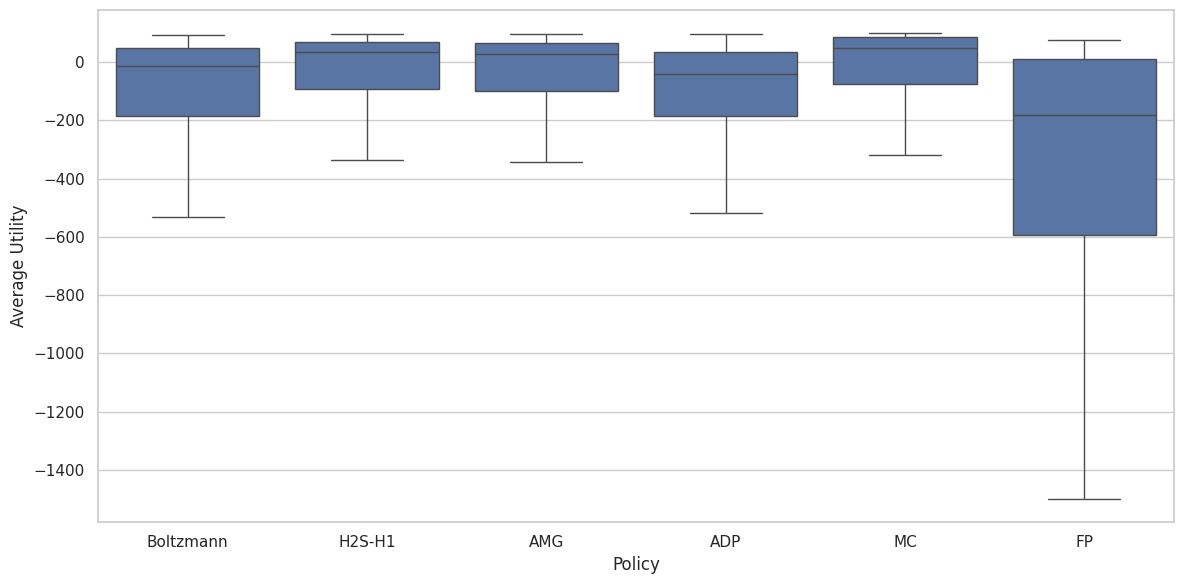

In [4]:
# Define renaming map
rename_policies = {
    "Boltzmann_reduced_k": "Boltzmann",
    "H2S (H=1)": "H2S Horizon=1",
    "AMG": "AMG",
    "ADP": "ADP",
    "MC": "MC",
    "FP": "FP"
}

# Make a new column with display names
df["policy_display"] = df["policy"].map(rename_policies).fillna(df["policy"])

# Plot with the new column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="policy_display", y="def_avg_util", showfliers=False)
plt.xlabel("Policy")  # update x-axis label
plt.ylabel("Average Utility")
plt.tight_layout()
plt.savefig("def_util_boxplot_no_outliers.png")
plt.show()

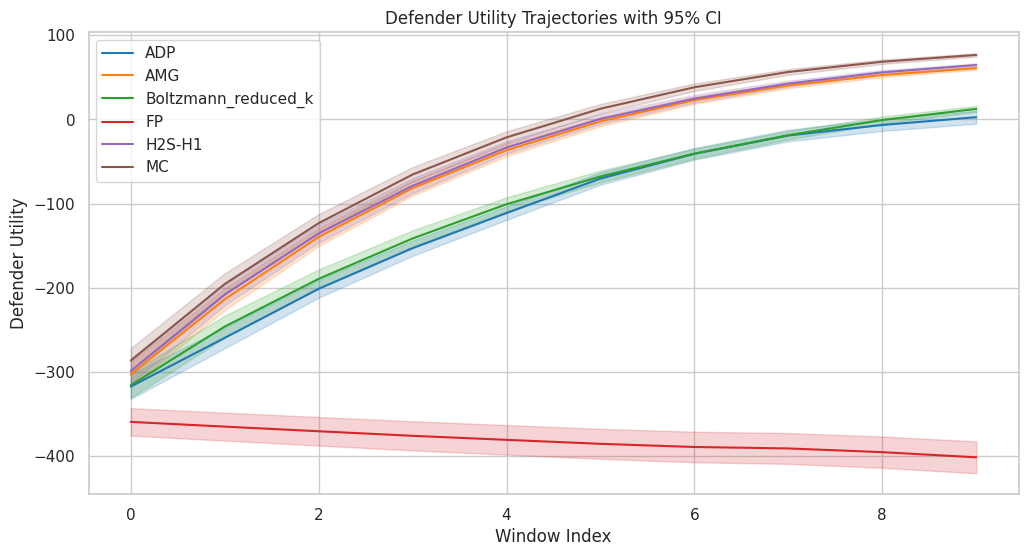

In [4]:

df['def_win_means'] = df['def_win_means'].apply(safe_eval)
df['atk_win_means'] = df['atk_win_means'].apply(safe_eval)

rows = []
for _, row in df.iterrows():
    if isinstance(row['def_win_means'], (list, tuple, np.ndarray)):
        for t, val in enumerate(row['def_win_means']):
            rows.append({"policy": row['policy'], "replicate": row['replicate'], "window": t, "utility": val})
df_long = pd.DataFrame(rows)

summary = (
    df_long.groupby(["policy", "window"])["utility"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
summary["sem"] = summary["std"] / np.sqrt(summary["count"])
summary["ci95"] = 3 * summary["sem"]

plt.figure(figsize=(12, 6))
cmap = plt.get_cmap("tab10").colors

for i, pol in enumerate(summary["policy"].unique()):
    sub = summary[summary["policy"] == pol]
    plt.plot(sub["window"], sub["mean"], label=pol, color=cmap[i % len(cmap)])
    plt.fill_between(sub["window"], sub["mean"] - sub["ci95"], sub["mean"] + sub["ci95"],
                     alpha=0.2, color=cmap[i % len(cmap)])

plt.title("Defender Utility Trajectories with 95% CI")
plt.xlabel("Window Index")
plt.ylabel("Defender Utility")
plt.legend()
plt.show()


In [5]:
def parse_actions(val):
    if isinstance(val, str):
        val = val.strip(" []")
        return [int(x) for x in val.replace(",", " ").split() if x]
    return val

def parse_latent_state(val):
    if isinstance(val, str):
        val = val.strip(" []")
        return [float(x) for x in val.replace(",", " ").split() if x]
    return val

df['defender_actions'] = df['defender_actions'].apply(parse_actions)
df['latent_state_record'] = df['latent_state_record'].apply(parse_latent_state)
# Check a few entries
print(df['defender_actions'].iloc[0])
print(type(df['defender_actions'].iloc[0]))
print(df['latent_state_record'].iloc[0])
print(type(df['latent_state_record'].iloc[0]))

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2]
<class 'list'>
[2.0485754, 2.5673811, 3.136174, 4.1406803, 1.3508179, 1.2008251, 0.50672483, 0.21767846, 0.44399065, -0.4992724, -2.866129, -3.2410133, -4.519384, -6.591014, -5.1341763, -5.149117, -6.6606326, -6.9314847, -8.159096, -9.350424, -8.493558, -8.245443, -8.590776, -8.782836, -8.605131, -7.096496, -7.558512, -7.368526, -7.9069996, -6.6509733, -6.022119, -4.72605, -4.2609177, -2.1183996, -1.7130625, -2.0555453, -0.75902164, -1.5847231, -2.5161705, -3.4313912, -2.7024825, -0.799088, 1.6044347, 1.7131513, 2.303969, 1.7994549, 2.6034274, 3.519685, 5.385566, 4.996935, 6.5277143, 5.31841, 6.6450047, 7.4090595, 7.0753508, 5.8673887, 8.162792, 7.143714, 6.7300806, 5.8590703, 4.916771, 6.0

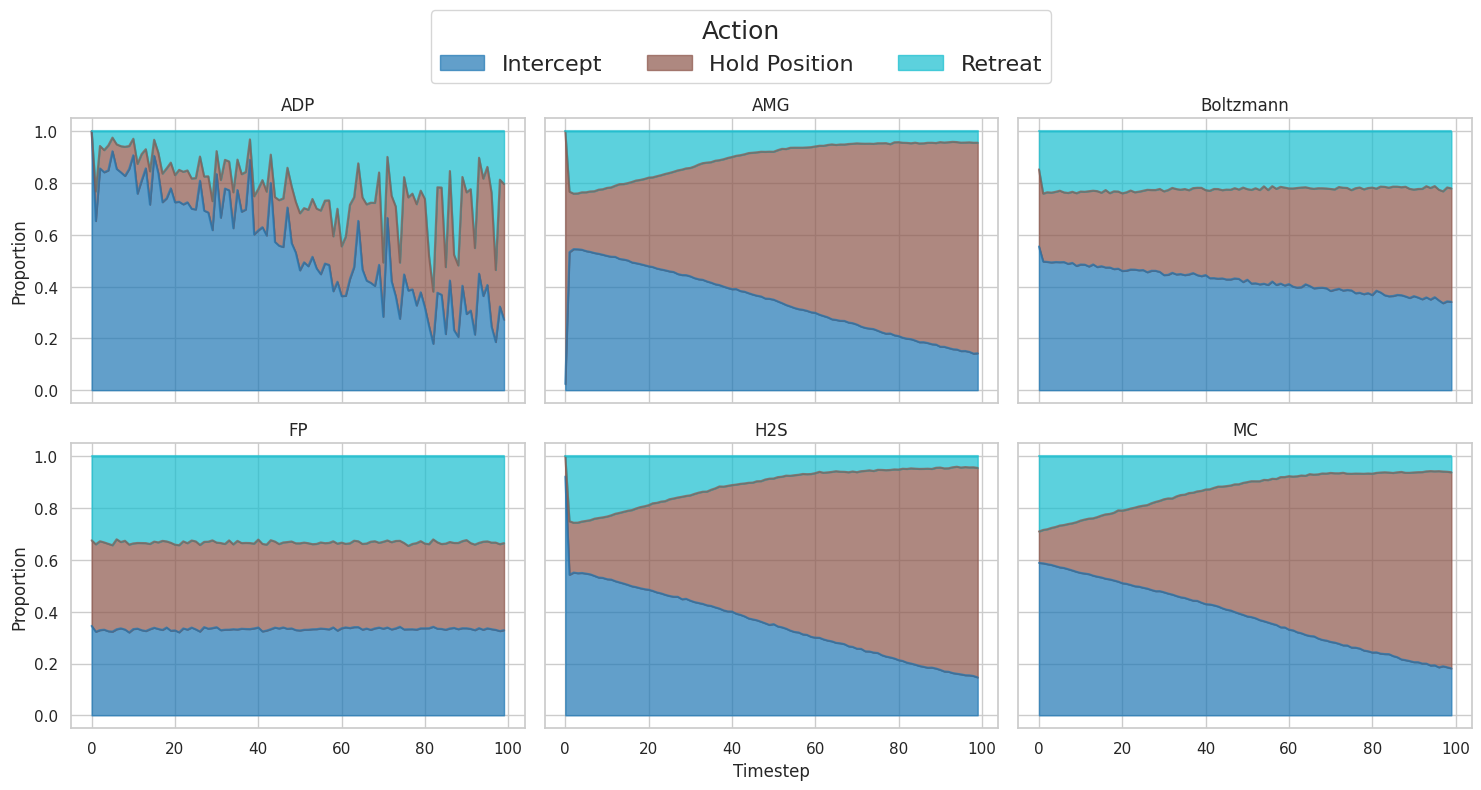

In [6]:
# Ensure defender_actions are parsed into lists
df['defender_actions'] = df['defender_actions'].apply(safe_eval)

# Explode into long format
rows = []
for _, row in df.iterrows():
    acts = row['defender_actions']
    if isinstance(acts, (list, tuple, np.ndarray)):
        for t, act in enumerate(acts):
            rows.append({
                "policy": row['policy'],
                "timestep": t,
                "action": act
            })

actions_long = pd.DataFrame(rows)

# Count occurrences per (policy, timestep, action)
counts = actions_long.groupby(["policy", "timestep", "action"]).size().reset_index(name="count")

# Normalize within each (policy, timestep) to get probabilities
counts["prob"] = counts["count"] / counts.groupby(["policy", "timestep"])["count"].transform("sum")

# We already have counts with columns: policy, timestep, action, prob

# Pivot so each row is timestep × action probability per policy
plot_data = counts.pivot_table(
    index=["policy", "timestep"],
    columns="action",
    values="prob",
    fill_value=0
).reset_index()

# Melt back into long form for FacetGrid
plot_long = plot_data.melt(
    id_vars=["policy", "timestep"],
    var_name="action",
    value_name="prob"
)

# Pivot so each row is timestep × action probability per policy
plot_data = counts.pivot_table(
    index=["policy", "timestep"],
    columns="action",
    values="prob",
    fill_value=0
).reset_index()

# Melt back into long form (not strictly needed for area plots, but useful if we want seaborn later)
plot_long = plot_data.melt(
    id_vars=["policy", "timestep"],
    var_name="action",
    value_name="prob"
)

policies = plot_long["policy"].unique()
ncols = 3  # adjust depending on number of policies

fig, axes = plt.subplots(
    nrows=int(np.ceil(len(policies) / ncols)),
    ncols=ncols,
    figsize=(5 * ncols, 4 * int(np.ceil(len(policies) / ncols))),
    sharey=True,
    sharex=True
)

axes = axes.flatten()

# Policy renaming map
rename_policies = {
    "Boltzmann_reduced_k": "Boltzmann",
    "H2S-H1": "H2S",
    "AMG": "AMG",
    "ADP": "ADP",
    "MC": "MC",
    "FP": "FP"
}

for i, pol in enumerate(policies):
    ax = axes[i]
    sub = plot_long[plot_long["policy"] == pol]
    pivot = sub.pivot(index="timestep", columns="action", values="prob").fillna(0)
    
    pivot.plot.area(ax=ax, cmap="tab10", alpha=0.7, legend=False)  # suppress per-axis legend
    
    # Use renamed label if available
    pol_label = rename_policies.get(pol, pol)
    ax.set_title(pol_label)
    # Figure out this subplot's column index
    col = i % ncols
    if col == ncols // 2:   # only the center column
        ax.set_xlabel("Timestep")
    else:
        ax.set_xlabel("")
    ax.set_ylabel("Proportion")

# Remove empty axes if grid > number of policies
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Collect handles/labels from first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Custom mapping for action labels
rename_actions = {
    "0": "Intercept",
    "1": "Hold Position",
    "2": "Retreat"
}
new_labels = [rename_actions.get(lbl, lbl) for lbl in labels]

# Add one shared master legend
# Add one shared master legend
fig.legend(
    handles,
    new_labels,
    title="Action",
    loc="upper center",
    ncol=len(new_labels),
    fontsize=16,          # increase legend text size
    title_fontsize=18     # increase legend title size
)

plt.tight_layout(rect=[0, 0, 1, 0.90])  # leave space at top for legend
plt.savefig("actions_over_time_2x3.png")
plt.show()


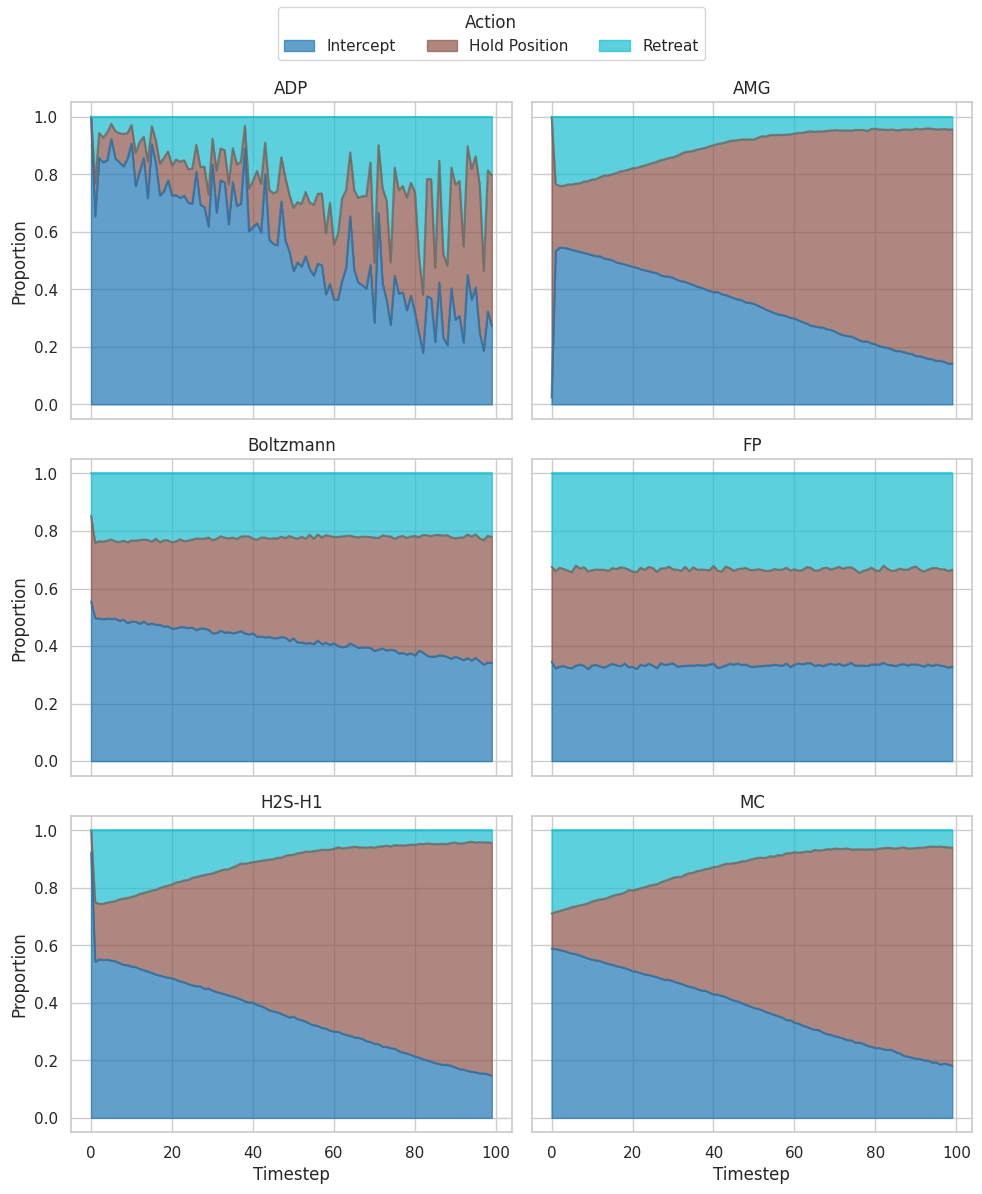

In [8]:
policies = plot_long["policy"].unique()
ncols = 2  # adjust depending on number of policies

fig, axes = plt.subplots(
    nrows=int(np.ceil(len(policies) / ncols)),
    ncols=ncols,
    figsize=(5 * ncols, 4 * int(np.ceil(len(policies) / ncols))),
    sharey=True,
    sharex=True
)

axes = axes.flatten()

# Policy renaming map
rename_policies = {
    "Boltzmann_reduced_k": "Boltzmann",
    "H2S (H=1)": "H2S (Horizon=1)",
    "AMG": "AMG",
    "ADP": "ADP",
    "MC": "MC",
    "FP": "FP"
}

for i, pol in enumerate(policies):
    ax = axes[i]
    sub = plot_long[plot_long["policy"] == pol]
    pivot = sub.pivot(index="timestep", columns="action", values="prob").fillna(0)
    
    pivot.plot.area(ax=ax, cmap="tab10", alpha=0.7, legend=False)  # suppress per-axis legend
    
    # Use renamed label if available
    pol_label = rename_policies.get(pol, pol)
    ax.set_title(pol_label)
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Proportion")

# Remove empty axes if grid > number of policies
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Collect handles/labels from first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Custom mapping for action labels
rename_actions = {
    "0": "Intercept",
    "1": "Hold Position",
    "2": "Retreat"
}
new_labels = [rename_actions.get(lbl, lbl) for lbl in labels]

# Add one shared master legend
fig.legend(handles, new_labels, title="Action", loc="upper center", ncol=len(new_labels))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space at top for legend
plt.savefig("actions_over_time_3x2.png")
plt.show()

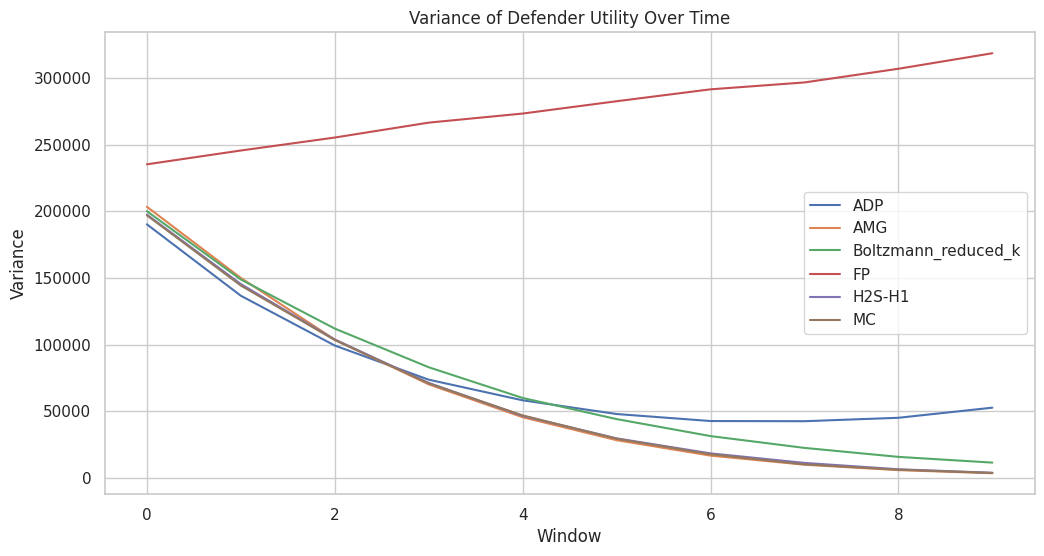

In [7]:
df['def_win_means'] = df['def_win_means'].apply(safe_eval)

rows = []
for _, row in df.iterrows():
    if isinstance(row['def_win_means'], (list, tuple, np.ndarray)):
        for t, val in enumerate(row['def_win_means']):
            rows.append({"policy": row['policy'], "window": t, "utility": val})
df_long = pd.DataFrame(rows)

var_summary = df_long.groupby(["policy", "window"])["utility"].var().reset_index()

plt.figure(figsize=(12, 6))
for pol in var_summary["policy"].unique():
    sub = var_summary[var_summary["policy"] == pol]
    plt.plot(sub["window"], sub["utility"], label=pol)
plt.title("Variance of Defender Utility Over Time")
plt.xlabel("Window")
plt.ylabel("Variance")
plt.legend()
plt.show()

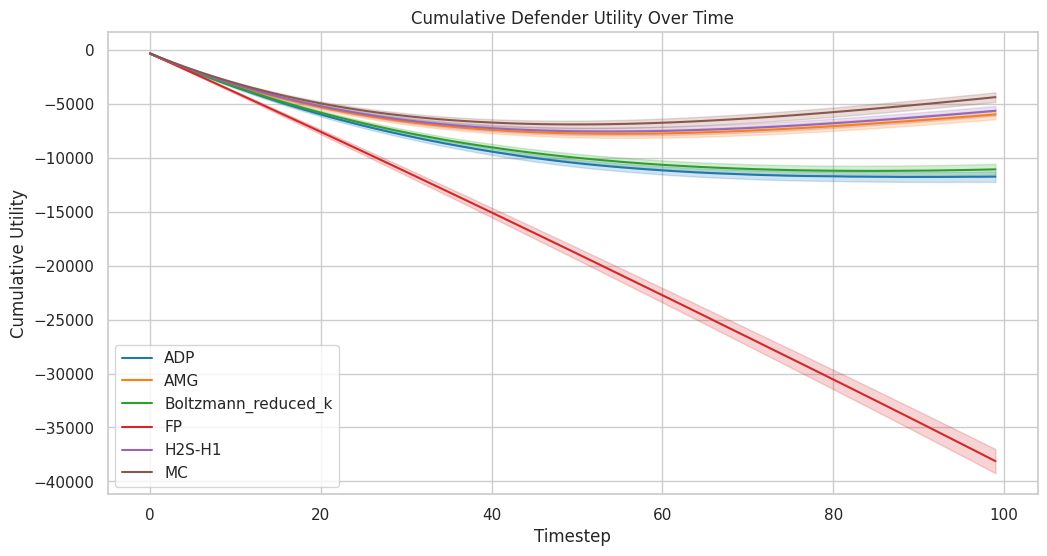

In [8]:
def parse_utilities(val):
    if isinstance(val, str):
        # remove 'array(' and ')' if they exist
        val = val.replace("array(", "").replace(")", "")
        # remove newlines
        val = val.replace("\n", " ")
        # remove brackets
        val = val.strip(" []")
        # split on whitespace
        nums = [float(x) for x in val.split() if x]
        return nums
    return val

df['defender_utilities'] = df['defender_utilities'].apply(parse_utilities)

rows = []
for _, row in df.iterrows():
    utils = row['defender_utilities']
    if isinstance(utils, (list, tuple, np.ndarray)):
        cum = np.cumsum(utils)  # cumulative payoff
        for t, val in enumerate(cum):
            rows.append({
                "policy": row.get("policy") or row.get("Policy"),
                "replicate": row.get("replicate") or row.get("Replicate"),
                "timestep": t,
                "cum_util": val
            })

df_cum = pd.DataFrame(rows)

# Compute mean & CI across replicates
summary = (
    df_cum.groupby(["policy", "timestep"])["cum_util"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
summary["sem"] = summary["std"] / np.sqrt(summary["count"])
summary["ci95"] = 1.96 * summary["sem"]

# Plot cumulative trajectories with CI
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap("tab10").colors

for i, pol in enumerate(summary["policy"].unique()):
    sub = summary[summary["policy"] == pol]
    plt.plot(sub["timestep"], sub["mean"], label=pol, color=cmap[i % len(cmap)])
    plt.fill_between(sub["timestep"], sub["mean"]-sub["ci95"], sub["mean"]+sub["ci95"], 
                     color=cmap[i % len(cmap)], alpha=0.2)

plt.title("Cumulative Defender Utility Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Utility")
plt.legend()
plt.show()


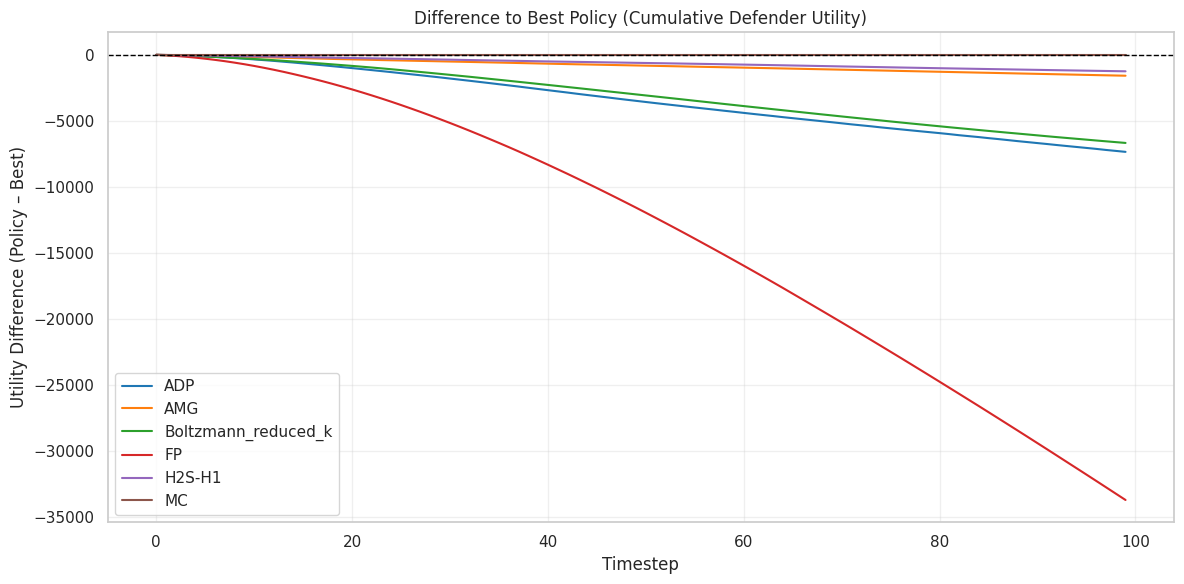

In [9]:
# We assume df_cum already exists with: policy, replicate, timestep, cum_util
# (from earlier parsing of defender_utilities into cumulative trajectories)

# Compute mean cumulative utility per policy × timestep
mean_traj = (
    df_cum.groupby(["policy", "timestep"])["cum_util"]
    .mean()
    .reset_index()
)

# Find the best policy per timestep
best_traj = (
    mean_traj.groupby("timestep")["cum_util"]
    .max()
    .reset_index()
    .rename(columns={"cum_util": "best_util"})
)

# Merge back to compute difference
diff_df = mean_traj.merge(best_traj, on="timestep")
diff_df["diff_to_best"] = diff_df["cum_util"] - diff_df["best_util"]

# Plot: one line per policy showing its gap to best
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap("tab10").colors

for i, pol in enumerate(diff_df["policy"].unique()):
    sub = diff_df[diff_df["policy"] == pol]
    plt.plot(sub["timestep"], sub["diff_to_best"], label=pol, color=cmap[i % len(cmap)])

plt.axhline(0, color="black", lw=1, ls="--")
plt.title("Difference to Best Policy (Cumulative Defender Utility)")
plt.xlabel("Timestep")
plt.ylabel("Utility Difference (Policy – Best)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
# --- Helper to parse the beta strings ---
def parse_betas(beta_str):
    return np.fromstring(beta_str.strip("[]"), sep=" ")

# --- Choose a single test instance + replicate ---
test_instance = df['config_file'].iloc[np.random.randint(0, 50)]
replicate = 0
subset = df[(df['config_file'] == test_instance) & (df['replicate'] == replicate)]

# --- Extract attacker and defender bounds (first two betas) ---
atk_betas = parse_betas(subset['attacker_betas'].iloc[0])
def_betas = parse_betas(subset['defender_betas'].iloc[0])

atk_bounds = (atk_betas[0], atk_betas[1])
def_bounds = (def_betas[0], def_betas[1])

# --- Plot latent state trajectories ---
plt.figure(figsize=(12, 6))

for _, row in subset.iterrows():
    latent = np.fromstring(row['latent_state_record'].strip("[]"), sep=" ")
    if row['policy'] == "MC":
        plt.plot(latent, label=row['policy'], color="black", linewidth=3, zorder=3)
    else:
        plt.plot(latent, label=row['policy'], alpha=0.9, linewidth=2)


# Shaded spans
plt.axhspan(atk_bounds[0], atk_bounds[1], color="red", alpha=0.1)
plt.axhspan(def_bounds[0], def_bounds[1], color="blue", alpha=0.1)

# Boundary lines
plt.axhline(atk_bounds[0], color="red", linestyle="--", linewidth=2)
plt.axhline(atk_bounds[1], color="red", linestyle="--", linewidth=2)
plt.axhline(def_bounds[0], color="blue", linestyle="--", linewidth=2)
plt.axhline(def_bounds[1], color="blue", linestyle="--", linewidth=2)

plt.text(len(latent)-1, atk_bounds[1], "Attacker MAD", color="red", va="bottom", ha="right")
plt.text(len(latent)-1, atk_bounds[0], "Attacker MSD", color="red", va="top", ha="right")

plt.text(len(latent)-1, def_bounds[1], "Defender MAD", color="blue", va="bottom", ha="left")
plt.text(len(latent)-1, def_bounds[0], "Defender MSD", color="blue", va="top", ha="left")

plt.title(f"Latent State Record for Policies\nInstance: {test_instance}, Replicate: {replicate}")
plt.xlabel("Timestep")
plt.ylabel("Latent State Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'list' object has no attribute 'strip'

<Figure size 1200x600 with 0 Axes>

In [11]:
def parse_actions(action_data):
    """Parse actions whether stored as string or list."""
    if isinstance(action_data, str):
        return np.fromstring(action_data.strip("[]"), sep=" ", dtype=int)
    elif isinstance(action_data, list) or isinstance(action_data, np.ndarray):
        return np.array(action_data, dtype=int)
    else:
        raise ValueError(f"Unsupported type for actions: {type(action_data)}")

plt.figure(figsize=(12, 6))

# for _, row in subset.iterrows():
#     atk_actions = parse_actions(row['attacker_actions'])
#     def_actions = parse_actions(row['defender_actions'])
    
#     # Plot attacker actions (solid line)
#     plt.step(range(len(atk_actions)), atk_actions, where="post",
#              label=f"{row['policy']} (Attacker)", linewidth=2, alpha=0.8)
    
#     # Plot defender actions (dashed line, same color)
#     plt.step(range(len(def_actions)), def_actions, where="post",
#              linestyle="--", linewidth=2, alpha=0.8)

# plt.title(f"Action Trajectories for Policies\nInstance: {test_instance}, Replicate: {replicate}")
# plt.xlabel("Timestep")
# plt.ylabel("Action")
# plt.yticks([0, 1, 2])  # assuming 3 actions
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# n = len(subset)
# fig, axes = plt.subplots(n, 1, figsize=(12, 2*n), sharex=True)

# for ax, (_, row) in zip(axes, subset.iterrows()):
#     atk_actions = parse_actions(row['defender_actions'])
#     ax.step(range(len(atk_actions)), atk_actions, where="post", linewidth=2)
#     ax.set_title(f"{row['policy']} (Defender)")
#     ax.set_yticks([0, 1, 2])

# plt.xlabel("Timestep")
# plt.tight_layout()
# plt.show()

import seaborn as sns

# Collect actions for each policy into a matrix
policies = []
action_matrix = []

for _, row in subset.iterrows():
    atk_actions = parse_actions(row['defender_actions'])
    policies.append(row['policy'])
    action_matrix.append(atk_actions)

action_matrix = np.array(action_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(action_matrix, cmap="Set1", cbar=True, xticklabels=50, yticklabels=policies)

plt.title(f"Attacker Actions Over Time\nInstance: {test_instance}, Replicate: {replicate}")
plt.xlabel("Timestep")
plt.ylabel("Policy")
plt.show()



NameError: name 'subset' is not defined

<Figure size 1200x600 with 0 Axes>

In [12]:
# --- Parse helper ---
def parse_actions(action_data):
    if isinstance(action_data, str):
        return np.fromstring(action_data.strip("[]"), sep=" ", dtype=int)
    elif isinstance(action_data, (list, np.ndarray)):
        return np.array(action_data, dtype=int)
    else:
        raise ValueError(f"Unsupported type for actions: {type(action_data)}")

# --- Reuse the same instance + replicate as before ---
# (subset is already filtered for test_instance and replicate=0)

plt.figure(figsize=(12, 6))

for _, row in subset.iterrows():
    atk = parse_actions(row['attacker_actions'])
    dfn = parse_actions(row['defender_actions'])
    
    # Encode joint actions as categorical strings
    joint_actions = [f"{a}-{d}" for a, d in zip(atk, dfn)]
    
    # Scatter plot over time
    plt.scatter(range(len(joint_actions)), joint_actions,
                s=20, label=row['policy'], alpha=0.7)

plt.title(f"Joint Action Timeline per Policy\nInstance: {test_instance}, Replicate: {replicate}")
plt.xlabel("Timestep")
plt.ylabel("Joint Action (Attacker-Defender)")
plt.legend()
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'subset' is not defined

<Figure size 1200x600 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 6))

for _, row in subset.iterrows():
    # Parse defender utilities
    if isinstance(row['defender_utilities'], str):
        def_utils = np.fromstring(row['defender_utilities'].strip("[]"), sep=" ")
    else:
        def_utils = np.array(row['defender_utilities'])
    
    # Plot trajectory
    plt.plot(def_utils, label=row['policy'], linewidth=2, alpha=0.8)

plt.title(f"Defender Utility Trajectories\nInstance: {test_instance}, Replicate: {replicate}")
plt.xlabel("Timestep")
plt.ylabel("Defender Utility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'subset' is not defined

<Figure size 1200x600 with 0 Axes>

In [14]:
df.head(10)

config_file               policy  replicate        seed  \
0  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          0  2111243565   
1  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          1  4131607270   
2  ACRL_beta_level_0_instance_0  Boltzmann_reduced_k          2  2646667378   
3  ACRL_beta_level_0_instance_0               H2S-H1          0  4216514892   
4  ACRL_beta_level_0_instance_0               H2S-H1          1  2264878765   
5  ACRL_beta_level_0_instance_0               H2S-H1          2  3461678326   
6  ACRL_beta_level_0_instance_0                  AMG          0  1220040996   
7  ACRL_beta_level_0_instance_0                  AMG          1  1219673808   
8  ACRL_beta_level_0_instance_0                  AMG          2   951105809   
9  ACRL_beta_level_0_instance_0                  ADP          0  3314530254   

   avg_comp_time  atk_avg_util  atk_tot_util  def_avg_util  def_tot_util  \
0       0.010557   -118.325880 -11832.588000   -290.488340  -29048.83400   
1       0.000431    -29.825882  -2982.588100    -73.218994   -7321.89940   
2       0.000406     -0.316314    -31.631447     -6.358504    -635.85040   
3       0.028704    -81.674126  -8167.412600   -225.862350  -22586.23400   
4       0.003603    -29.614650  -2961.465000    -81.134090   -8113.40870   
5       0.003612    -11.219379  -1121.938000    -26.234255   -2623.42550   
6       0.020084    -12.805292  -1280.529200     -2.454995    -245.49951   
7       0.000966    -31.371077  -3137.107700    -66.016846   -6601.68460   
8       0.000948    -26.428339  -2642.834000    -50.060380   -5006.03800   
9       0.002069   -137.490050 -13749.006000   -336.723600  -33672.36000   

      atk_action_dist  ...                                   attacker_actions  \
0  [0.23, 0.54, 0.23]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
1  [0.22, 0.46, 0.32]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
2     [0.1, 0.8, 0.1]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
3  [0.29, 0.42, 0.29]  ...  [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1...   
4  [0.16, 0.68, 0.16]  ...  [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1...   
5  [0.12, 0.77, 0.11]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
6   [0.16, 0.64, 0.2]  ...  [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1...   
7  [0.56, 0.22, 0.22]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
8  [0.18, 0.59, 0.23]  ...  [1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...   
9  [0.33, 0.34, 0.33]  ...  [1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2...   

                                    defender_actions  \
0  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
1  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, ...   
2  [1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, ...   
3  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
4  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
5  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
6  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
7  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
8  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
9  [0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, ...   

                                 latent_state_record  \
0  [2.0485754, 2.5673811, 3.136174, 4.1406803, 1....   
1  [0.62250149, -0.026342452, 1.3449064, 1.709827...   
2  [1.2462044, 0.5831677, 3.183198, 5.7696676, 5....   
3  [0.6749187, 3.1355908, 4.270482, 4.235691, 2.9...   
4  [1.6576612, 2.6255083, 3.679128, 4.754349, 3.6...   
5  [0.36443657, 0.6437261, 1.9158168, 2.948617, 3...   
6  [1.0028974, 2.4985428, 3.0149152, 3.0719402, 4...   
7  [0.33011115, -0.19313353, 0.76928705, 1.920013...   
8  [-0.62426627, -2.5974493, -0.04303694, 1.83580...   
9  [-0.32873893, 0.70266604, 0.5220026, -0.548955...   

                                      attacker_betas  \
0  [19.24988    40.87861    26.513294    0.80749416]   
1  [19.24988    40.87861    26.513294    0.80749416]   
2  [19.24988    40.

In [16]:
df_partial = df[["policy", "opponent_policy", "beta_level", "replicate", "seed", "atk_avg_util", "atk_tot_util", "def_avg_util", "def_tot_util", "attacker_utilities", "defender_utilities"]]
df_partial.to_csv("results_only_utils.csv", index=False)

In [17]:
# Define renaming map
rename_policies = {
    "Boltzmann_reduced_k": "Boltzmann",
    "H2S-H1": "H2S",
    "AMG": "AMG",
    "ADP": "ADP",
    "MC": "MC",
    "FP": "FP"
}

# Make a new column with display names
df["policy"] = df["policy"].map(rename_policies).fillna(df["policy"])


df["utils"] = df["defender_utilities"].apply(parse_latent_state)

pattern = r"(?P<method>\w+)_beta_level_(?P<beta_level>\d+)_instance_(?P<instance>\d+)"
df_parsed = df["config_file"].str.extract(pattern)


# Convert numeric fields to int
df_parsed["defender_policy"] = df['policy']
df_parsed['defender_actions'] = df['defender_actions']
df_parsed["beta_level"] = df_parsed["beta_level"].astype(int)
df_parsed["instance"] = df_parsed["instance"].astype(int)# Or with apply and lambda (more general)
df_parsed["first_state"] = df["latent_state_record"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df_parsed["last_state"] = df["latent_state_record"].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)
df_parsed["state_diff"] = df_parsed['last_state'] - df_parsed['first_state']
df_parsed["utils"] = df["utils"]

# Define bounds
lower, upper = 20, 50

df_parsed["in_bounds"] = df_parsed["last_state"].between(lower, upper)
df_parsed["out_bounds"] = ~df_parsed["in_bounds"]

df_parsed.head()

method  beta_level  instance defender_policy  \
0   ACRL           0         0       Boltzmann   
1   ACRL           0         0       Boltzmann   
2   ACRL           0         0       Boltzmann   
3   ACRL           0         0             H2S   
4   ACRL           0         0             H2S   

                                    defender_actions  first_state  last_state  \
0  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...     2.048575   23.985685   
1  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, ...     0.622501   22.338516   
2  [1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, ...     1.246204   29.619154   
3  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...     0.674919   20.702724   
4  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...     1.657661   30.577625   

   state_diff                                              utils  in_bounds  \
0   21.937110  [-380.6447, -291.416, -488.9068, -400.23935, -...       True   
1   21.716015  [-272.755615, -398.678894, -383.338776, -466.2...       True   
2   28.372950  [-342.85242, -269.31754, -316.08652, -392.2759...       True   
3   20.027805  [-497.10535, -238.12068, -489.06427, -301.9912...       True   
4   28.919964  [-398.38312, -410.0376, -366.93918, -250.35532...       True   

   out_bounds  
0       False  
1       False  
2       False  
3       False  
4       False

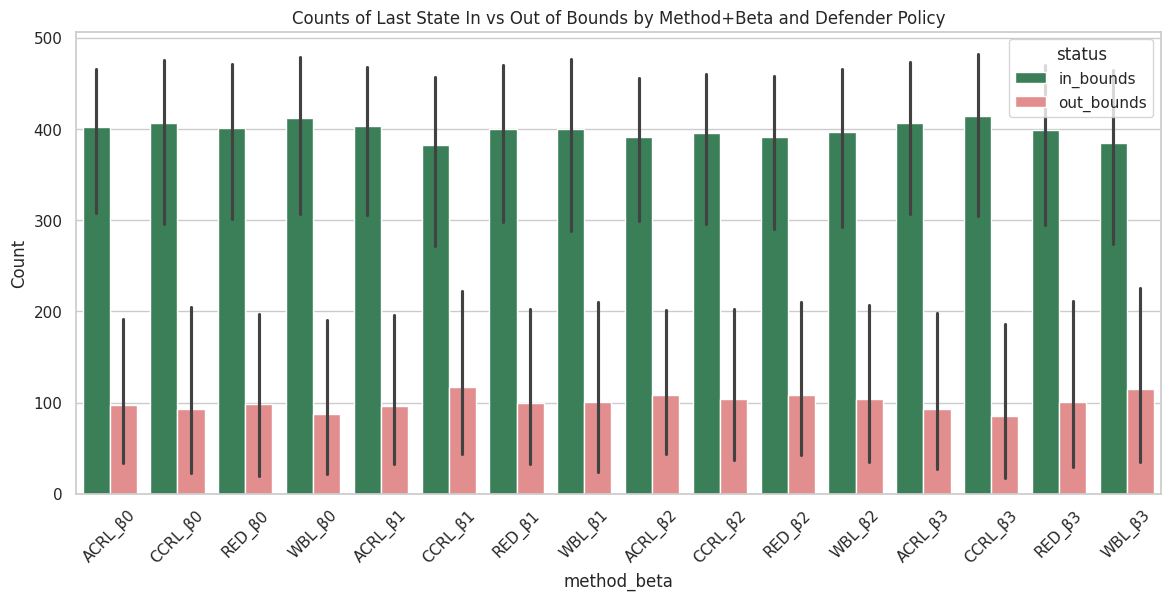

In [18]:
counts = (
    df_parsed
    .groupby(["beta_level", "method", "defender_policy"])["in_bounds"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

counts = counts.rename(columns={True: "in_bounds", False: "out_bounds"})

counts_melted = counts.melt(
    id_vars=["beta_level", "method", "defender_policy"],
    value_vars=["in_bounds", "out_bounds"],
    var_name="status", value_name="count"
)

counts_melted["method_beta"] = counts_melted["method"] + "_β" + counts_melted["beta_level"].astype(str)

plt.figure(figsize=(14,6))
sns.barplot(
    data=counts_melted,
    x="method_beta", y="count",
    hue="status",
    palette={"in_bounds": "seagreen", "out_bounds": "lightcoral"}
)
plt.title("Counts of Last State In vs Out of Bounds by Method+Beta and Defender Policy")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()




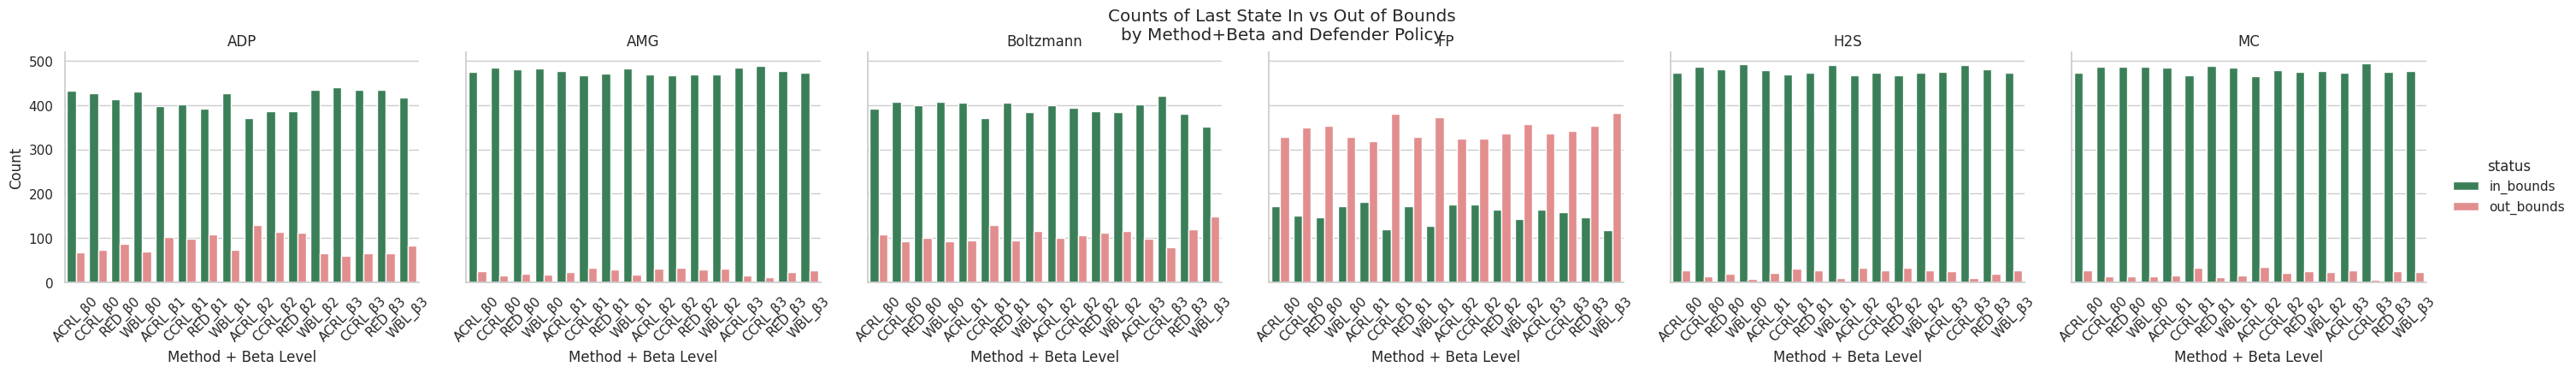

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create method+beta label for clarity on x-axis
counts_melted["method_beta"] = (
    counts_melted["method"] + "_β" + counts_melted["beta_level"].astype(str)
)

g = sns.catplot(
    data=counts_melted,
    x="method_beta", y="count",
    hue="status",
    col="defender_policy",   # facet by defender policy
    kind="bar",
    height=4, aspect=1.2,
    palette={"in_bounds": "seagreen", "out_bounds": "lightcoral"}
)

g.set_titles("{col_name}")
g.set_axis_labels("Method + Beta Level", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Counts of Last State In vs Out of Bounds\nby Method+Beta and Defender Policy")
plt.show()


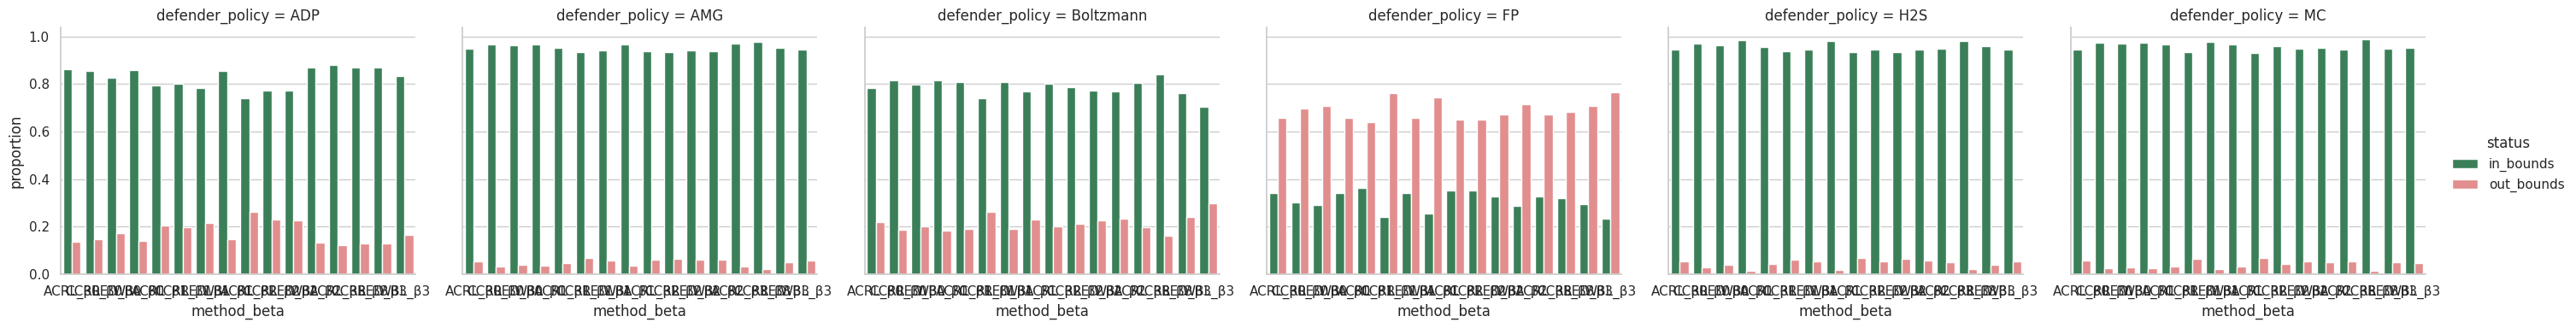

In [20]:
counts_melted["total"] = (
    counts_melted.groupby(["method", "beta_level", "defender_policy"])["count"].transform("sum")
)
counts_melted["proportion"] = counts_melted["count"] / counts_melted["total"]

sns.catplot(
    data=counts_melted,
    x="method_beta", y="proportion",
    hue="status",
    col="defender_policy",
    kind="bar",
    height=4, aspect=1.2,
    palette={"in_bounds": "seagreen", "out_bounds": "lightcoral"}
)


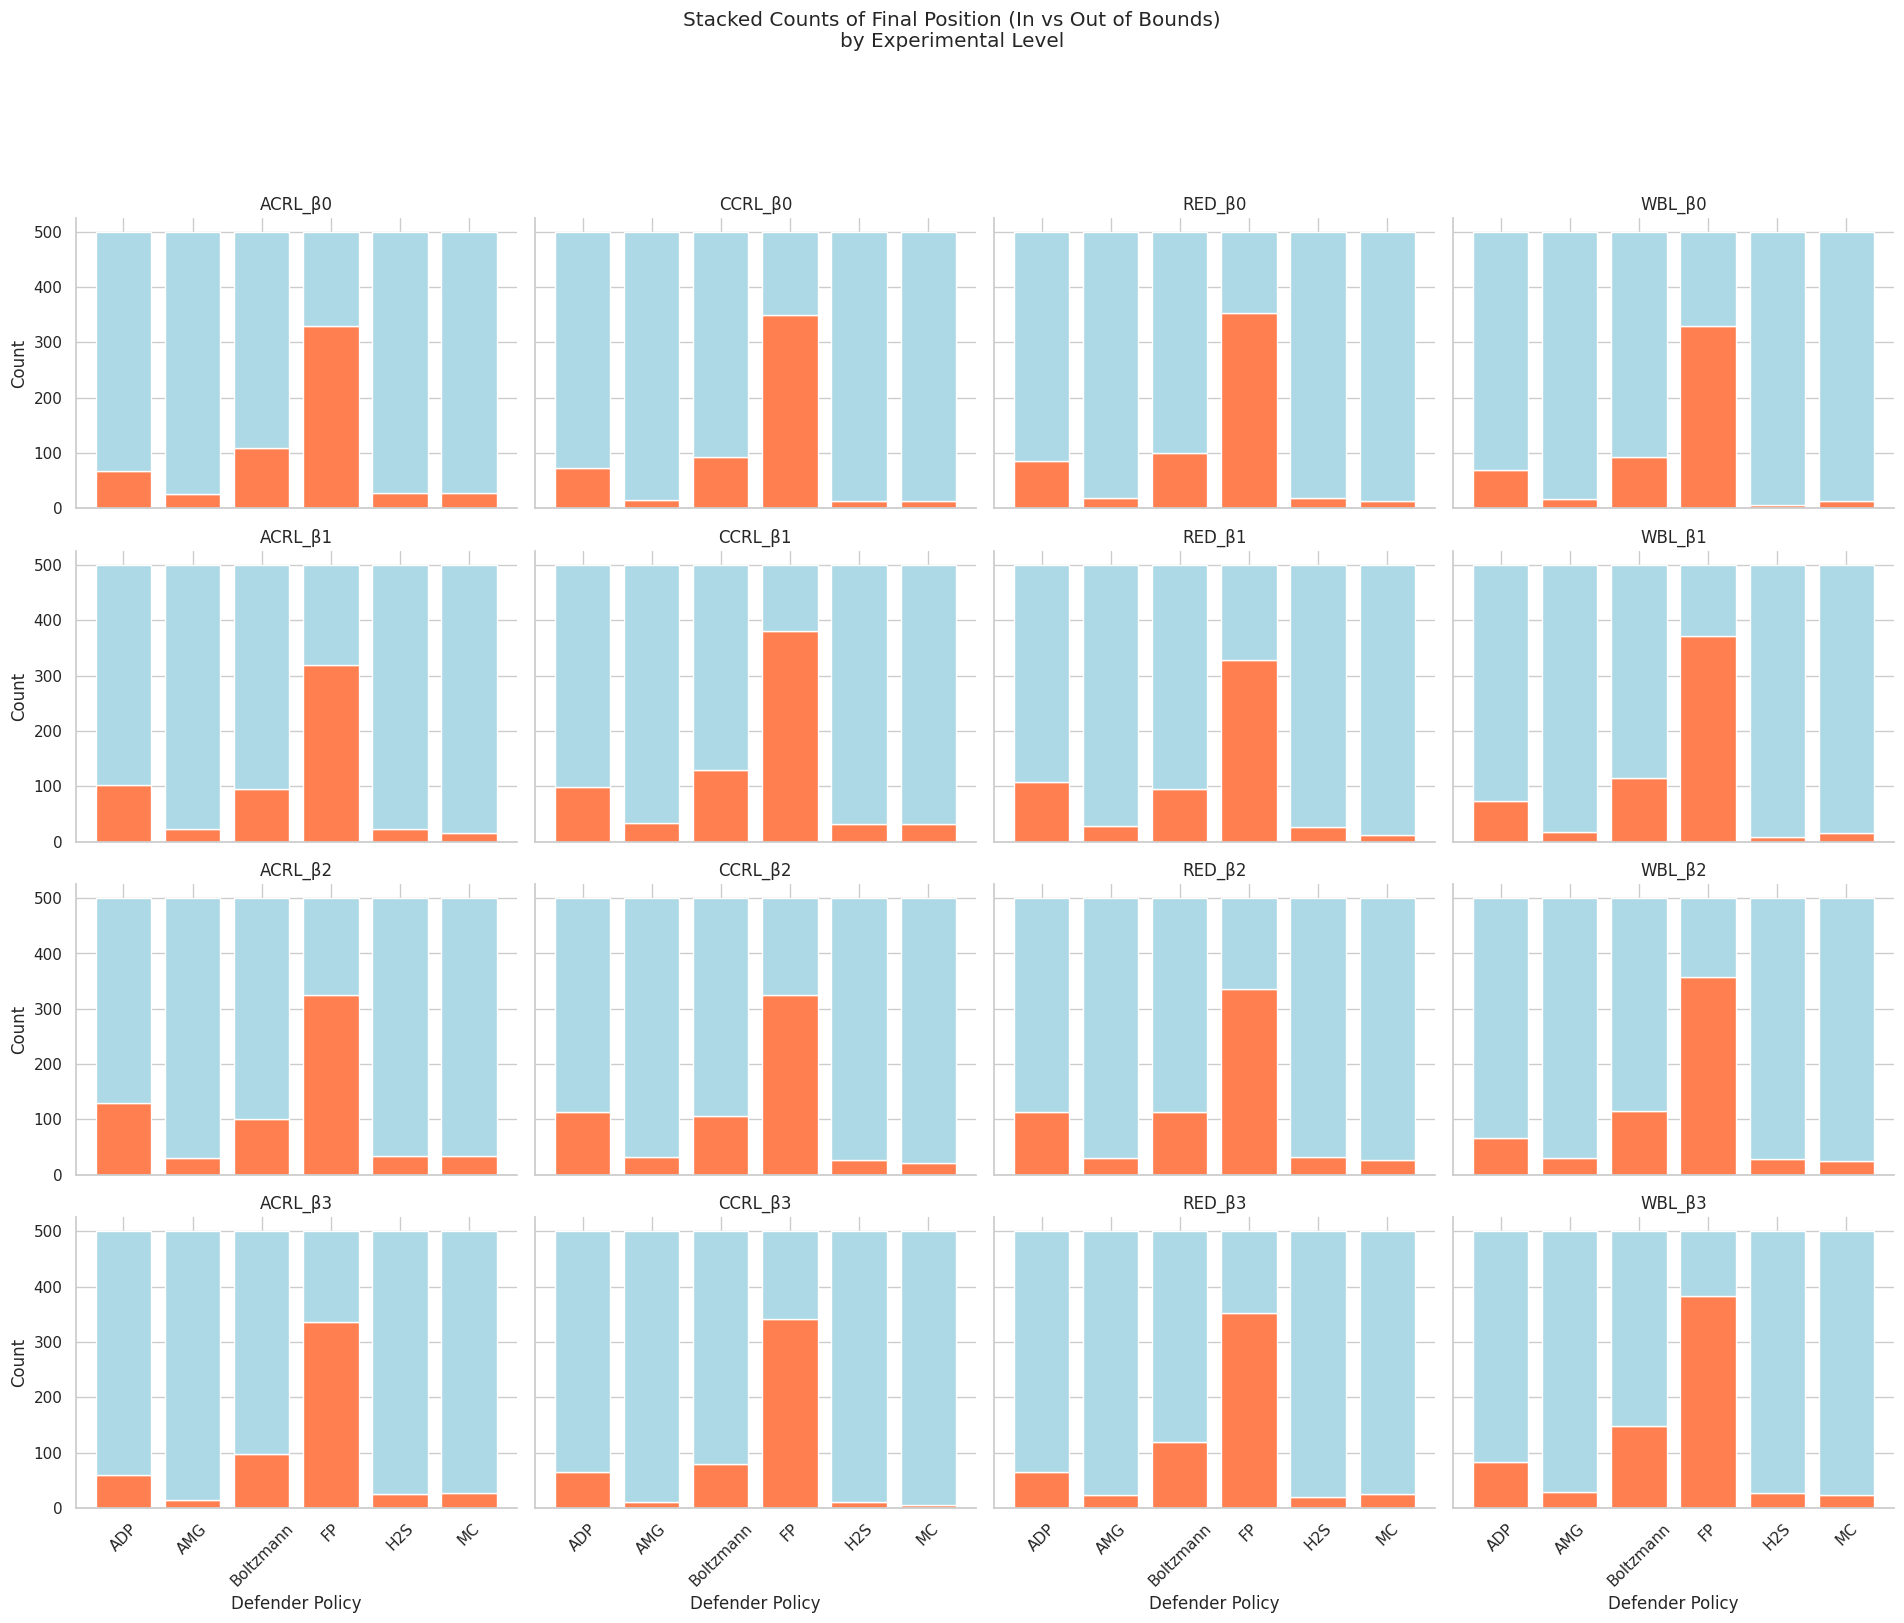

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

counts_melted["method_beta"] = (
    counts_melted["method"] + "_β" + counts_melted["beta_level"].astype(str)
)

g = sns.FacetGrid(
    data=counts_melted,
    col="method_beta",
    col_wrap=4,
    height=4, aspect=1.2
)

g.map_dataframe(
    sns.histplot,
    x="defender_policy",
    weights="count",    # use count as bar height
    hue="status",
    multiple="stack",
    palette={"in_bounds": "lightblue", "out_bounds": "coral"},
    shrink=0.8,
    alpha=1
)

g.set_titles("{col_name}")
g.set_axis_labels("Defender Policy", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Stacked Counts of Final Position (In vs Out of Bounds)\nby Experimental Level")
plt.show()



AttributeError: 'NoneType' object has no attribute 'remove'

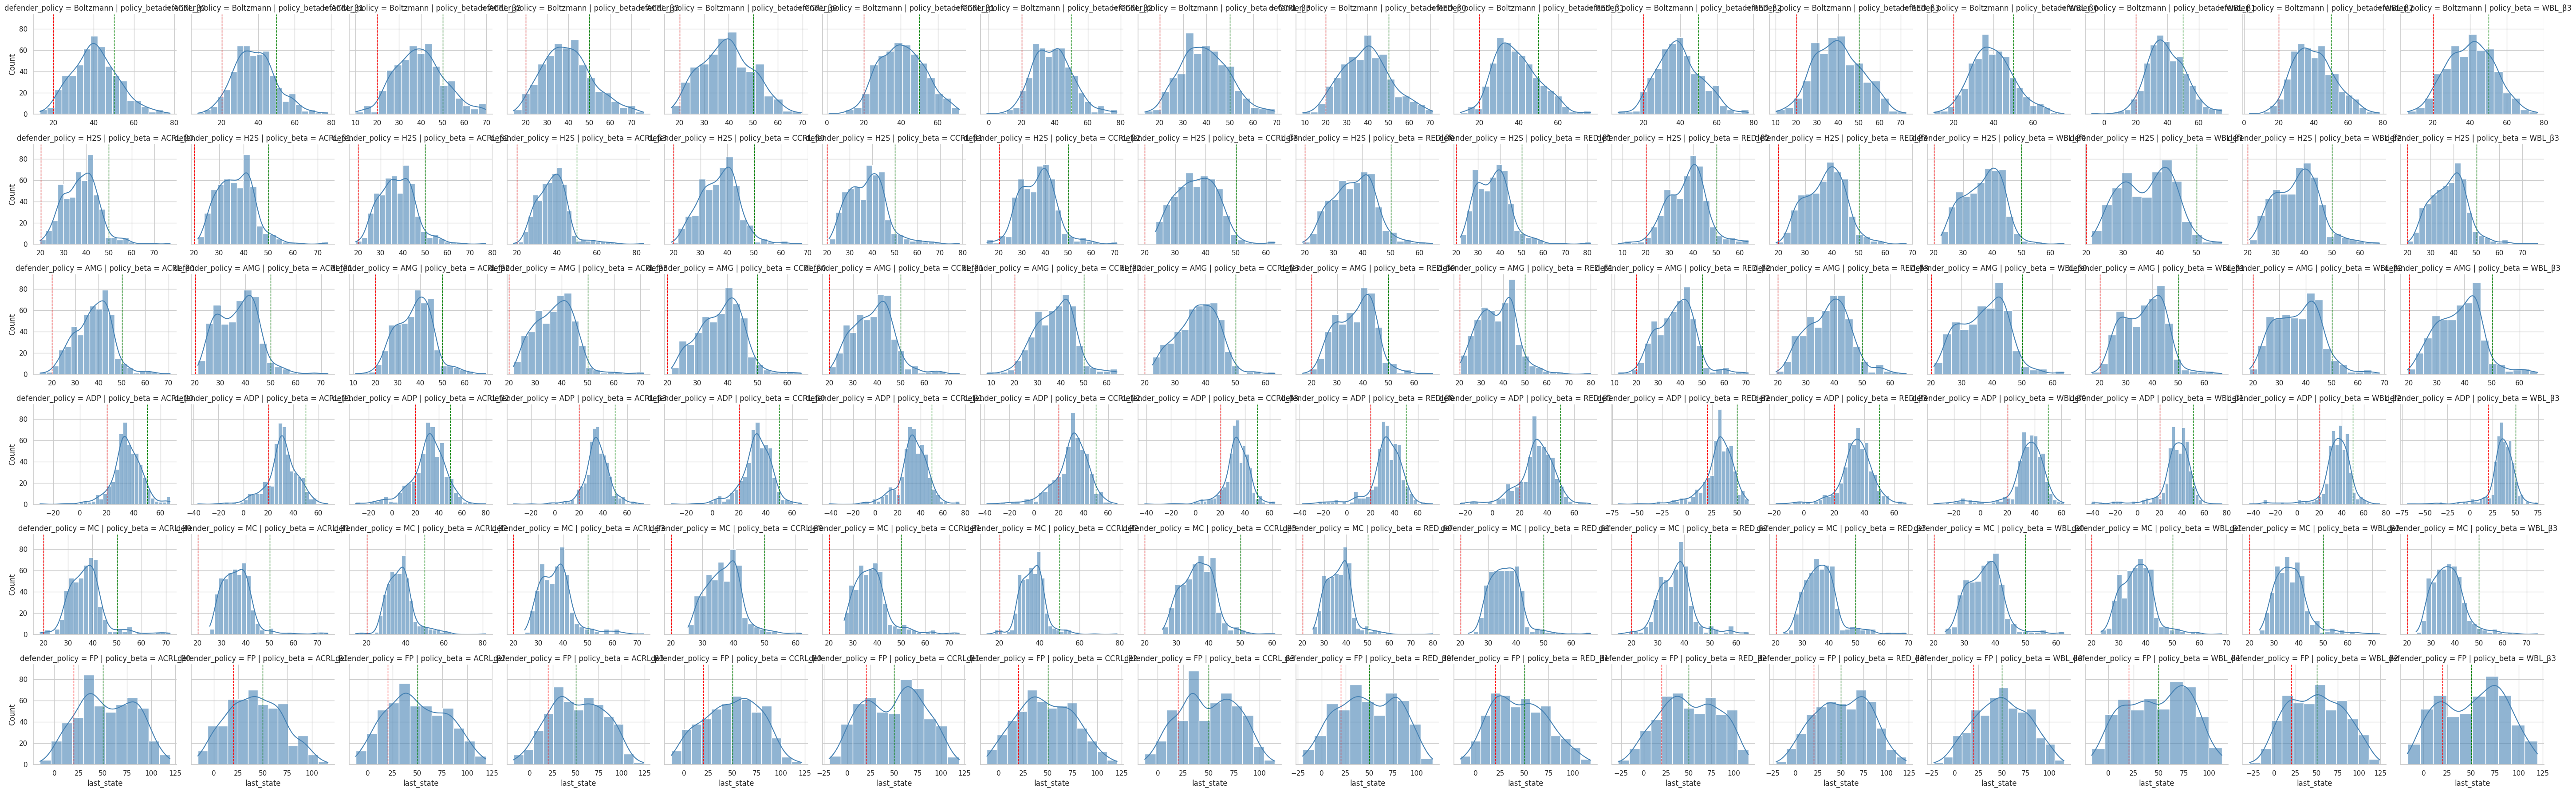

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df_parsed["policy_beta"] = df_parsed["method"] + "_β" + df_parsed["beta_level"].astype(str)

g = sns.FacetGrid(
    df_parsed,
    col="policy_beta",
    row="defender_policy",
    sharex=False, sharey=True,
    height=3, aspect=1.2
)
g.map(sns.histplot, "last_state", kde=True, color="steelblue", alpha=0.6)

# add vertical reference lines to every subplot
for ax in g.axes.flat:
    ax.axvline(x=20, color="red", linestyle="--", linewidth=1, label="MSD")
    ax.axvline(x=50, color="green", linestyle="--", linewidth=1, label="MAD")

# remove duplicate legends from each subplot
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()

# create a single shared legend
g.fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.02),
    frameon=False
)

# labels/titles
g.set_axis_labels("Last State", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distributions of Last State by Opponent Policy & Beta Configuration\nwith MSD and MAD thresholds")

plt.show()


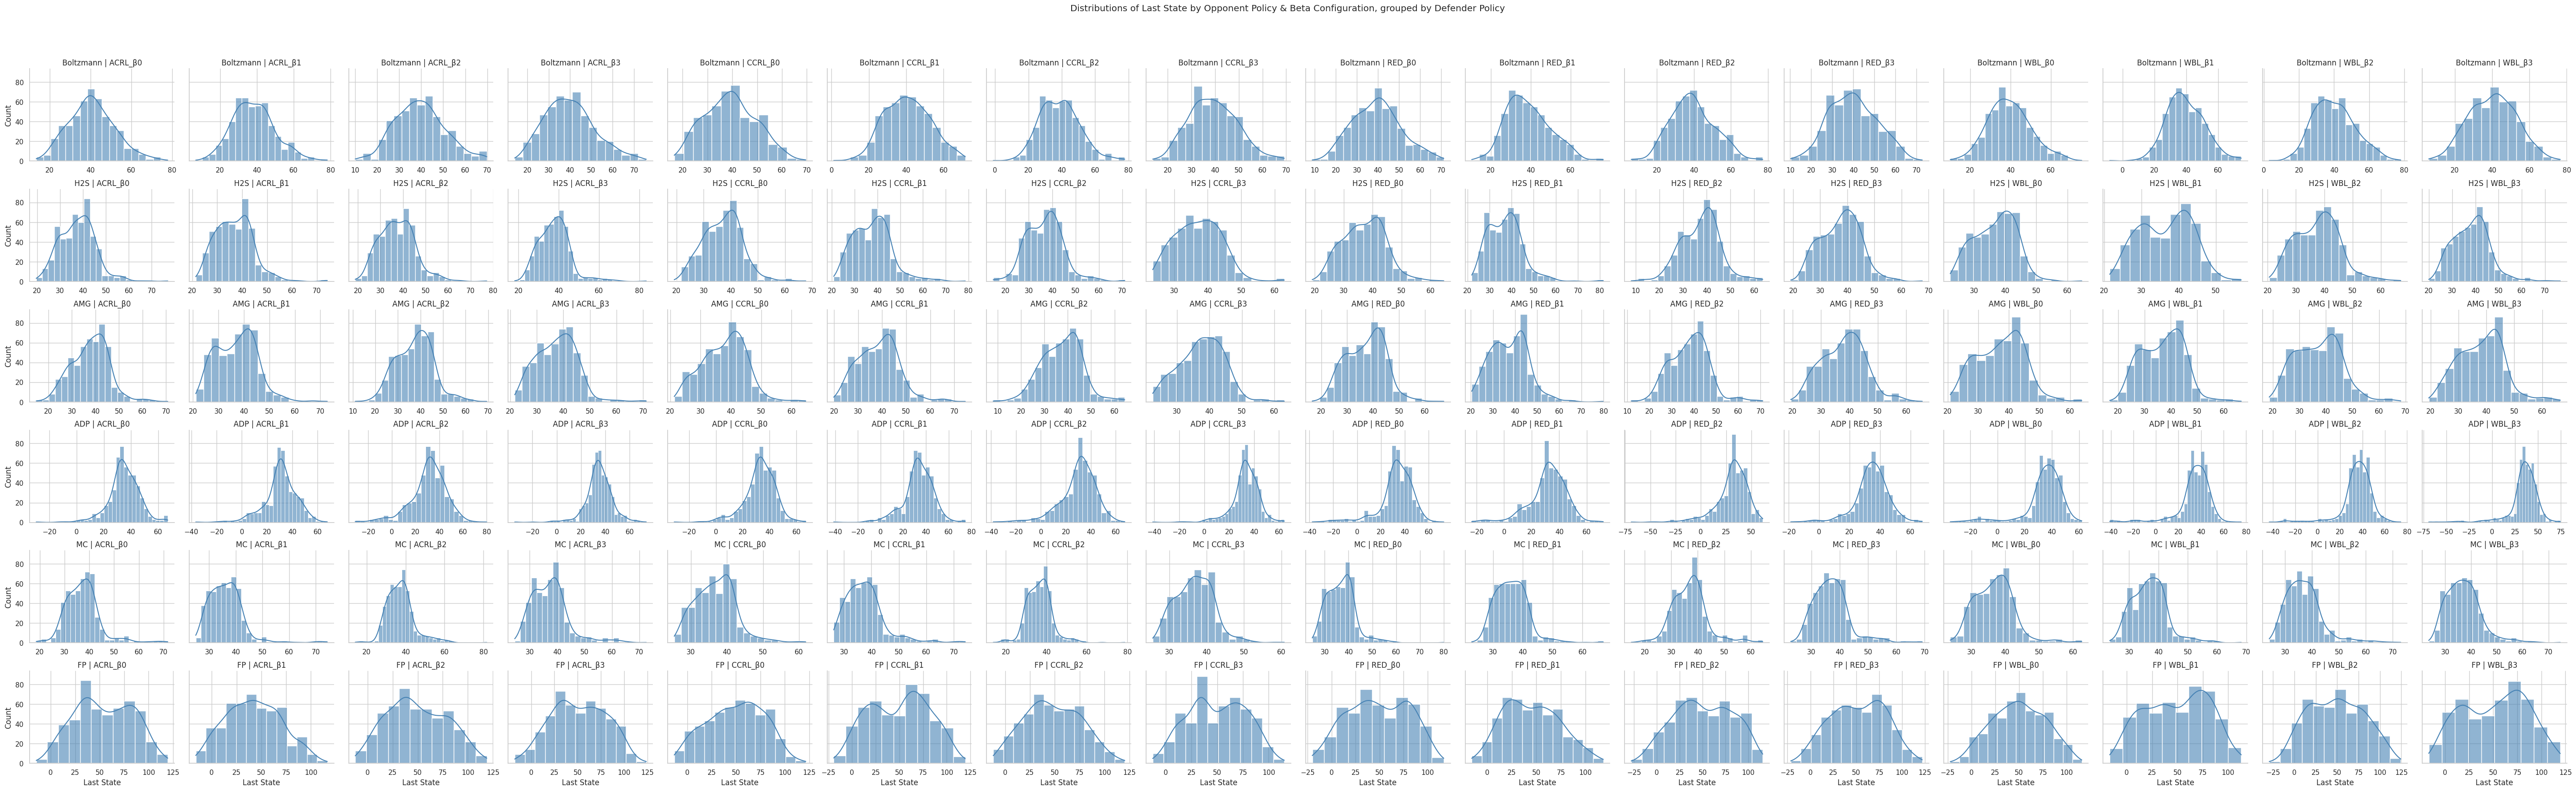

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df_parsed["policy_beta"] = df_parsed["method"] + "_β" + df_parsed["beta_level"].astype(str)


g = sns.FacetGrid(
    df_parsed,
    col="policy_beta",         # each method+beta gets its own column
    row="defender_policy",     # rows by policy (optional, drop if too cluttered)
    sharex=False, sharey=True,
    height=3, aspect=1.2
)
g.map(sns.histplot, "last_state", kde=True, color="steelblue", alpha=0.6)
g.set_axis_labels("Last State", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distributions of Last State by Opponent Policy & Beta Configuration, grouped by Defender Policy")
plt.show()


In [26]:
print(df_parsed["defender_actions"].iloc[0])
print(type(df_parsed["defender_actions"].iloc[0]))

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2]
<class 'list'>


In [27]:
# # Example: expand list of defender actions into long format
# df_long = df_parsed.explode("defender_actions").reset_index(drop=True)
# df_long["timestep"] = df_long.groupby(level=0).cumcount()  # index within each list

# print(df_long.head(20))

# keep track of original row before exploding
df_parsed = df_parsed.reset_index()  

df_long = df_parsed.explode("defender_actions")
df_long["timestep"] = df_long.groupby("index").cumcount()

action_counts = (
    df_long
    .groupby(["method", "beta_level", "timestep", "defender_actions", "defender_policy"])
    .size()
    .reset_index(name="count")
)

# normalize within each method/beta/timestep
action_counts["proportion"] = (
    action_counts.groupby(["method", "beta_level", "timestep"])["count"]
    .transform(lambda x: x / x.sum())
)

action_counts["method_beta"] = (
    action_counts["method"] + "_β" + action_counts["beta_level"].astype(str)
)

print(action_counts.head(6))
print(action_counts.dtypes)

action_counts["timestep"] = action_counts["timestep"].astype(int)
action_counts["proportion"] = action_counts["proportion"].astype(float)

action_counts.describe()


  method  beta_level  timestep  defender_actions defender_policy  count  \
0   ACRL           0         0                 0             ADP    500   
1   ACRL           0         0                 0             AMG     18   
2   ACRL           0         0                 0       Boltzmann    263   
3   ACRL           0         0                 0              FP    164   
4   ACRL           0         0                 0             H2S    463   
5   ACRL           0         0                 0              MC    320   

   proportion method_beta  
0    0.166667     ACRL_β0  
1    0.006000     ACRL_β0  
2    0.087667     ACRL_β0  
3    0.054667     ACRL_β0  
4    0.154333     ACRL_β0  
5    0.106667     ACRL_β0  
method               object
beta_level            int64
timestep              int64
defender_actions      int64
defender_policy      object
count                 int64
proportion          float64
method_beta          object
dtype: object


beta_level      timestep  defender_actions         count  \
count  28736.000000  28736.000000      28736.000000  28736.000000   
mean       1.500000     49.610245          0.998330    167.037862   
std        1.118053     28.803913          0.816395     94.075189   
min        0.000000      0.000000          0.000000      3.000000   
25%        0.750000     25.000000          0.000000    103.000000   
50%        1.500000     50.000000          1.000000    162.000000   
75%        2.250000     75.000000          2.000000    214.000000   
max        3.000000     99.000000          2.000000    500.000000   

         proportion  
count  28736.000000  
mean       0.055679  
std        0.031358  
min        0.001000  
25%        0.034333  
50%        0.054000  
75%        0.071333  
max        0.166667

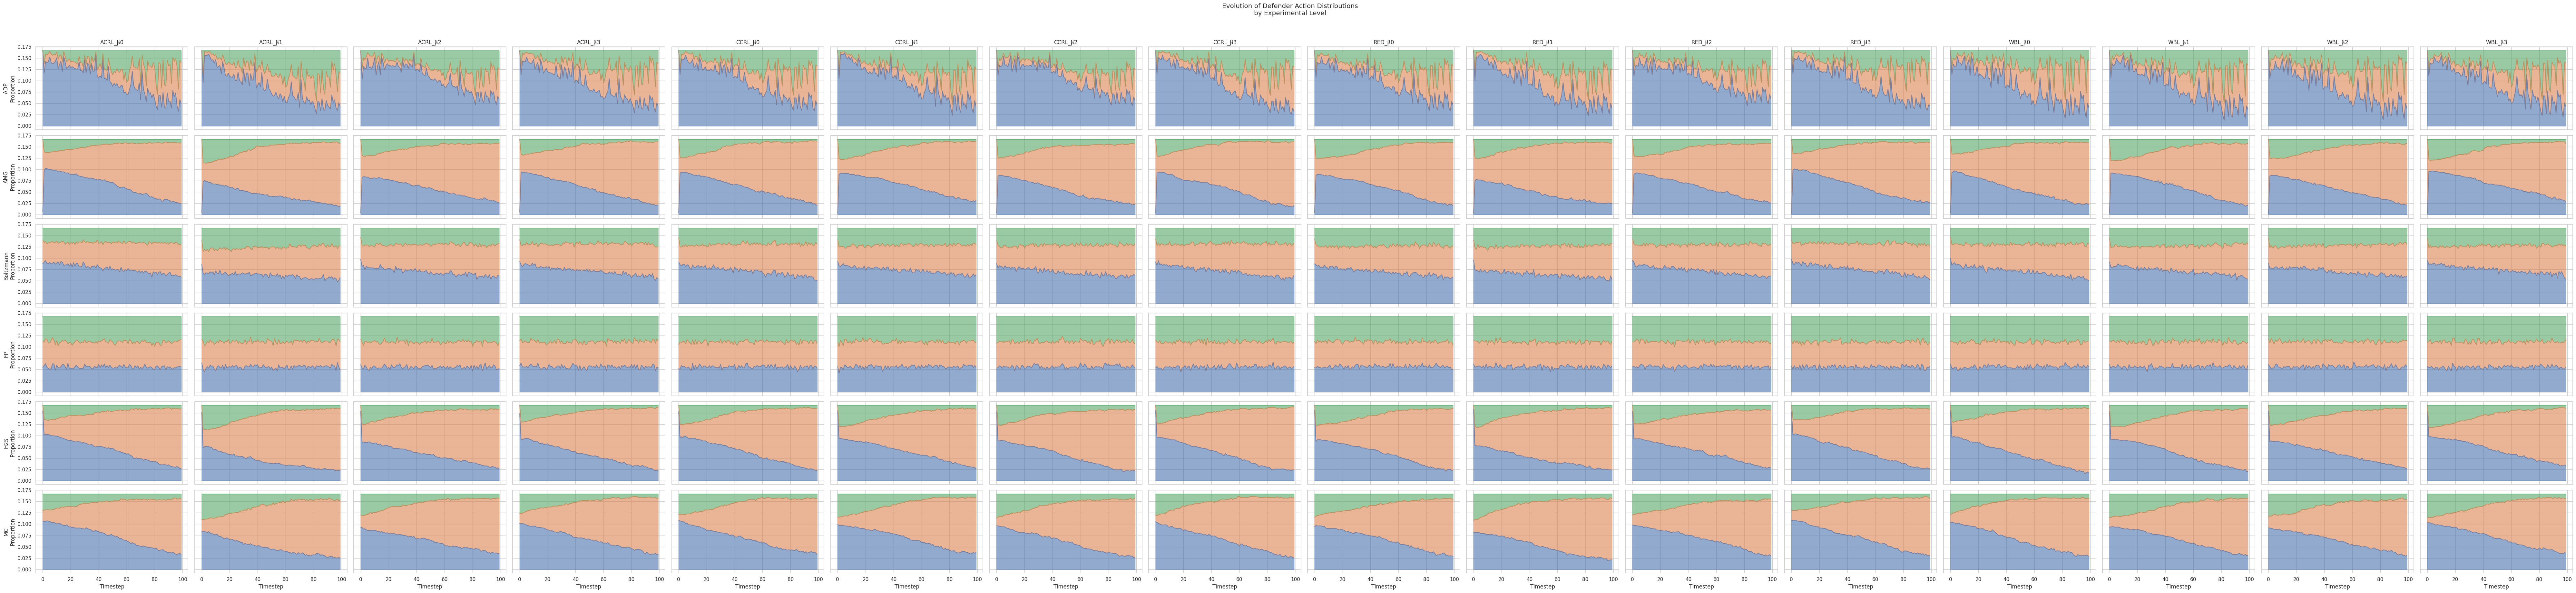

In [28]:
pivot = (
    action_counts
    .pivot_table(
        index=["method_beta", "defender_policy", "timestep"],
        columns="defender_actions",
        values="proportion",
        fill_value=0
    )
    .reset_index()
)

method_betas = pivot["method_beta"].unique()
policies = pivot["defender_policy"].unique()

ncols = len(method_betas)
nrows = len(policies)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(5*ncols, 3*nrows),
                         sharey=True, sharex=True)

# If only 1 row/col, make axes iterable
if nrows == 1 and ncols == 1:
    axes = np.array([[axes]])
elif nrows == 1:
    axes = axes[np.newaxis, :]
elif ncols == 1:
    axes = axes[:, np.newaxis]

for i, pol in enumerate(policies):
    for j, mb in enumerate(method_betas):
        ax = axes[i, j]
        sub = pivot[(pivot["method_beta"] == mb) & (pivot["defender_policy"] == pol)]
        sub = sub.sort_values("timestep")
        
        if not sub.empty:
            sub.plot.area(
                x="timestep",
                y=sub.columns.drop(["method_beta", "defender_policy", "timestep"]),
                ax=ax, alpha=0.6
            )
            ax.get_legend().remove()   # remove legend for this subplot
        
        if i == 0:
            ax.set_title(mb)
        if j == 0:
            ax.set_ylabel(f"{pol}\nProportion")
        else:
            ax.set_ylabel("")
        ax.set_xlabel("Timestep")

fig.suptitle("Evolution of Defender Action Distributions\nby Experimental Level", y=1.02)
plt.tight_layout()
plt.show()

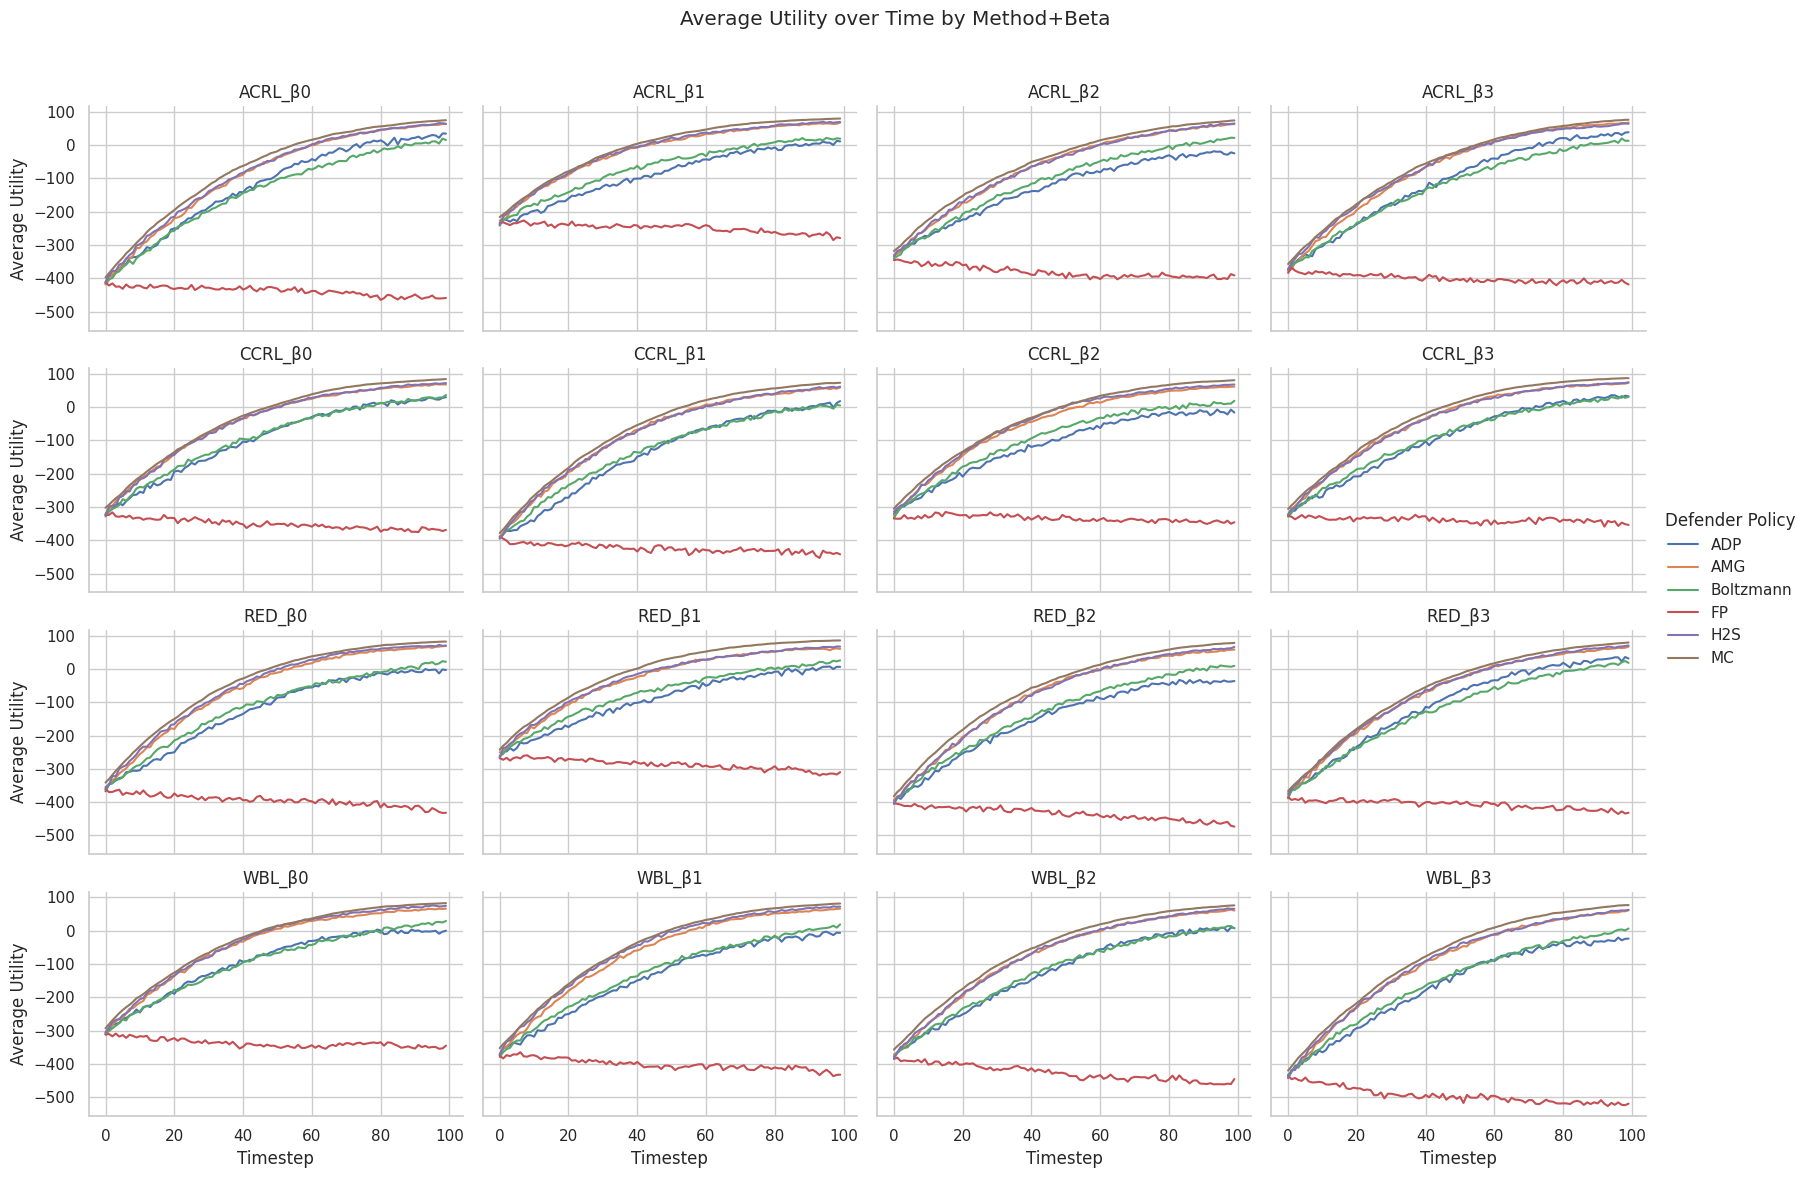

In [29]:
# explode utilities into long format
df_utils = df_parsed.reset_index().explode("utils")  # assumes column is "utilities"
df_utils["timestep"] = df_utils.groupby("index").cumcount()
df_utils["utilities"] = df_utils["utils"].astype(float)

# group by method, beta, policy, timestep
avg_utils = (
    df_utils
    .groupby(["method", "beta_level", "defender_policy", "timestep"])["utilities"]
    .mean()
    .reset_index()
)

avg_utils["method_beta"] = avg_utils["method"] + "_β" + avg_utils["beta_level"].astype(str)

# plot
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    avg_utils, 
    col="method_beta", 
    col_wrap=4, 
    hue="defender_policy", 
    sharey=True, sharex=True,
    height=3, aspect=1.4
)
g.map_dataframe(sns.lineplot, x="timestep", y="utilities")
g.add_legend(title="Defender Policy")
g.set_axis_labels("Timestep", "Average Utility")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average Utility over Time by Method+Beta")
plt.show()


In [34]:
# compute cumulative utility per trajectory before averaging
df_utils["cumulative_util"] = df_utils.groupby("index")["utilities"].cumsum()

cum_utils = (
    df_utils
    .groupby(["method", "beta_level", "defender_policy", "instance", "timestep"])["cumulative_util"]
    .mean()
    .reset_index()
)


cum_utils["opponent_type_and_beta"] = cum_utils["method"] + "_β" + (cum_utils["beta_level"] + 1).astype(str)
cum_utils_noFP = cum_utils[cum_utils["defender_policy"] != "FP"] #Filter out FP

In [ ]:
cum_utils["opponent_model"] =cum_utils["method"]
cum_utils = cum_utils.drop('method', axis =1)
cum_utils = cum_utils.drop('opponent_type_and_beta', axis =1)
cum_utils.head(5)


KeyError: 'method'

In [48]:
cum_utils.to_csv("cum_utils.csv", index=False)

KeyboardInterrupt: 

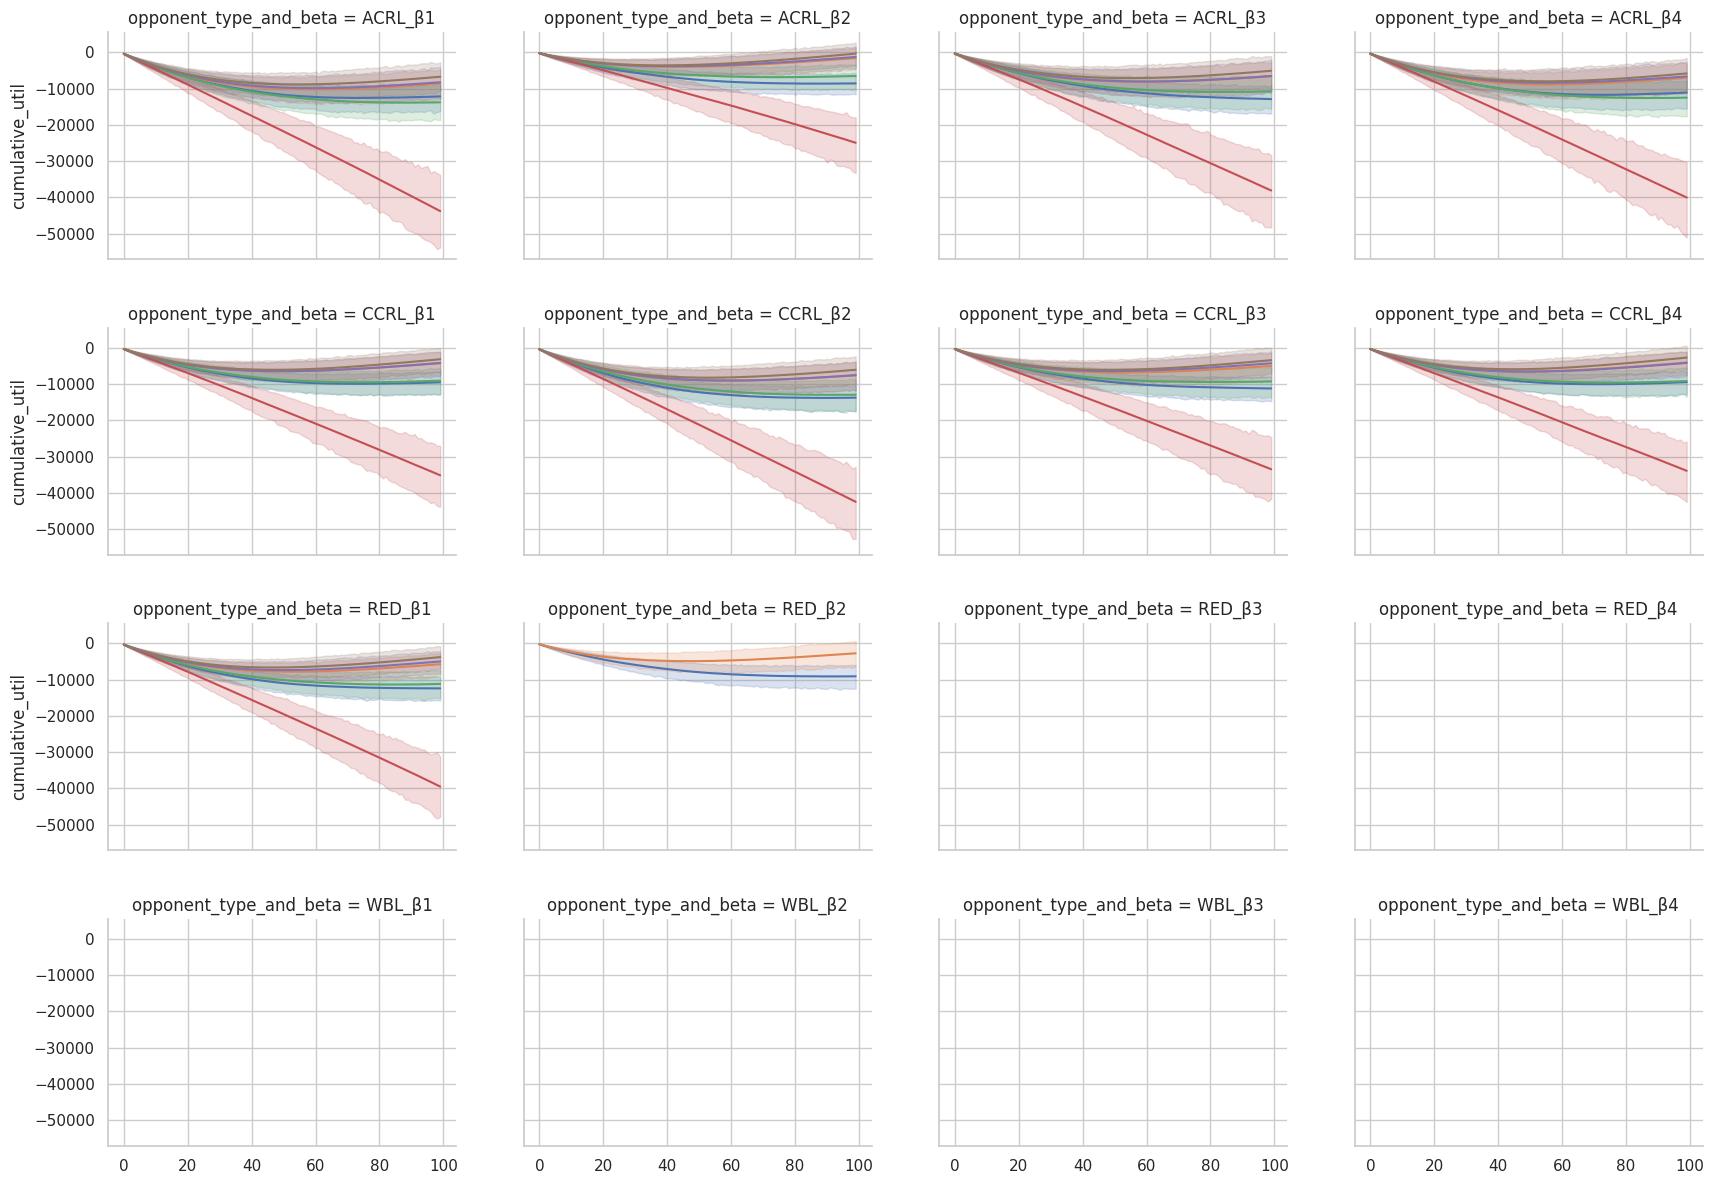

In [ ]:


# plot
g = sns.FacetGrid(
    cum_utils, 
    col="opponent_type_and_beta", 
    col_wrap=4, 
    hue="defender_policy", 
    sharey=True, sharex=True,
    height=3, aspect=1.4
)
g.map_dataframe(sns.lineplot, x="timestep", y="cumulative_util")
g.add_legend(title="Defender Policy")
g.set_axis_labels("Timestep", "Cumulative Utility")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Cumulative Utility over Time by each Experimental Level")
plt.show()


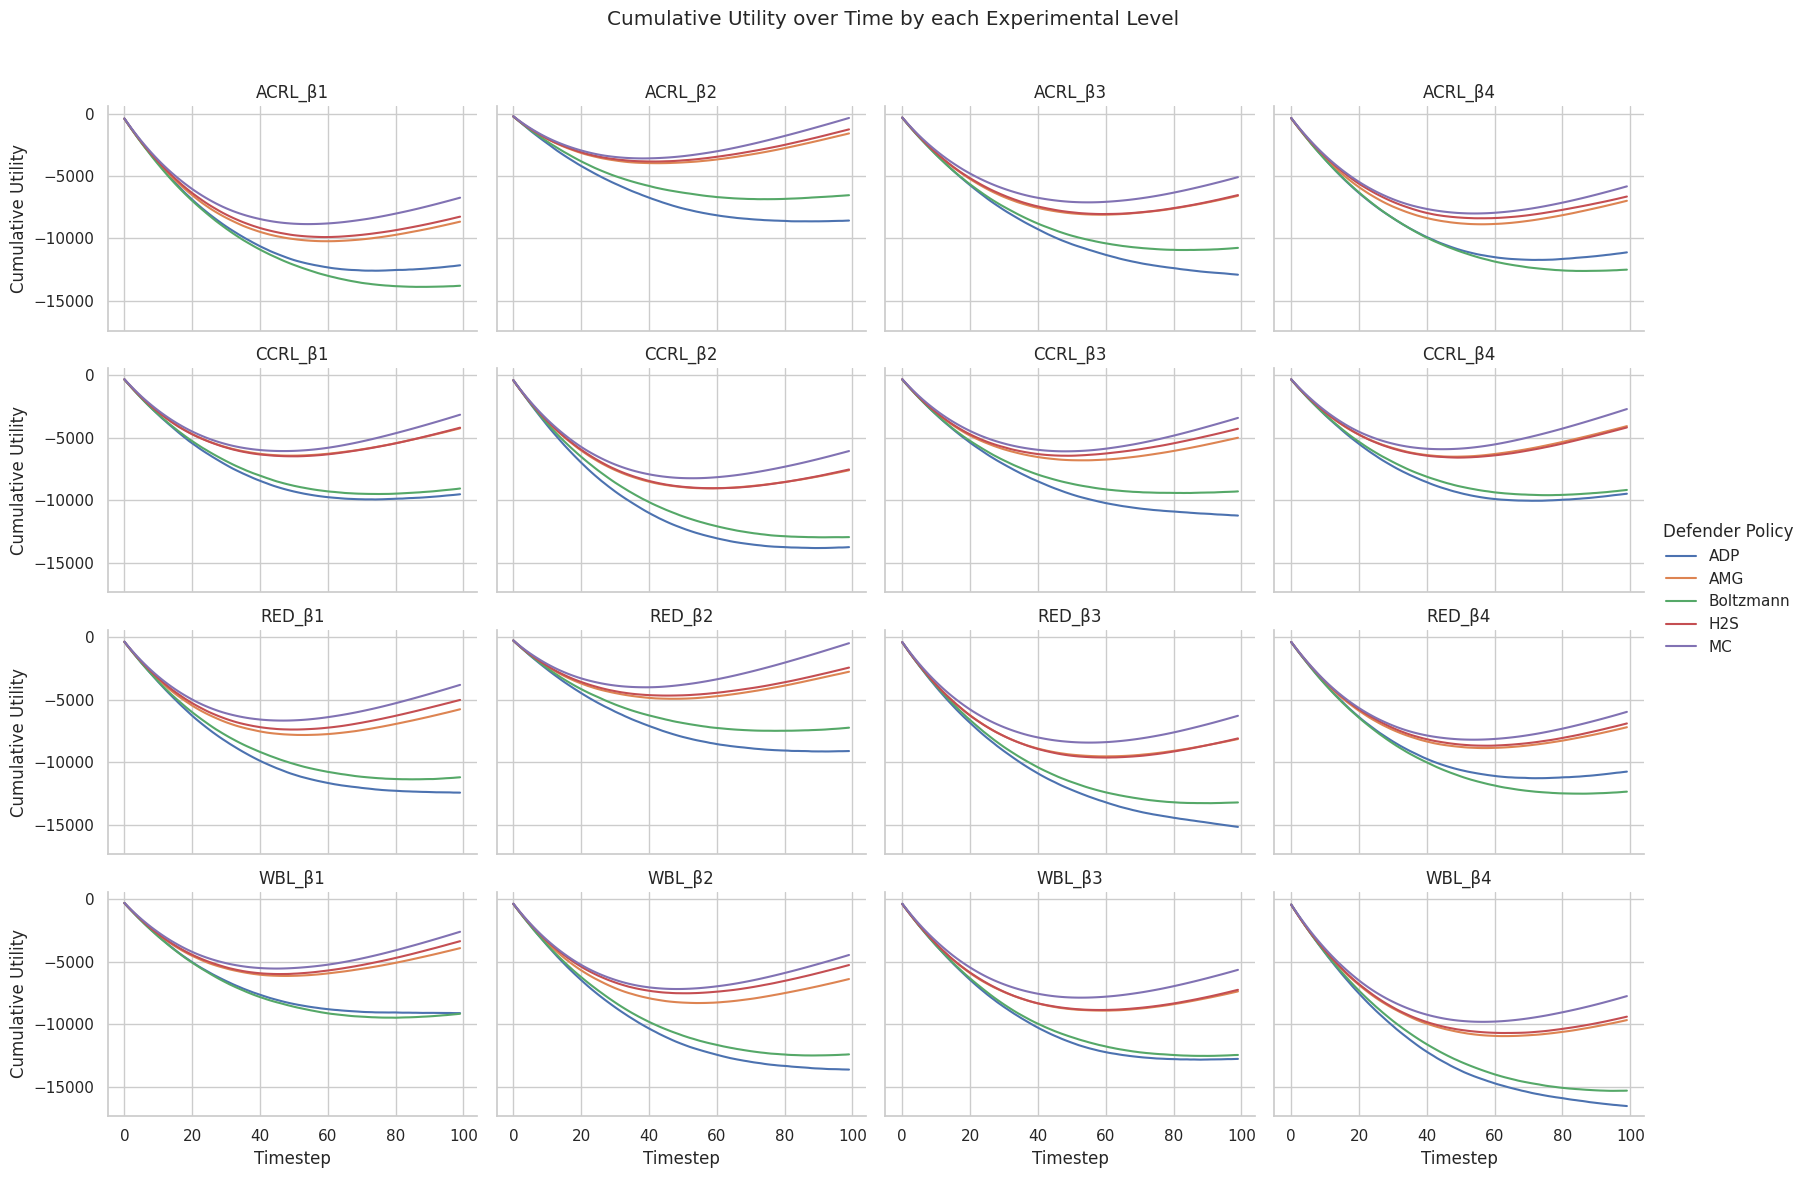

In [ ]:
# compute cumulative utility per trajectory before averaging
df_utils["cumulative_util"] = df_utils.groupby("index")["utilities"].cumsum()

cum_utils = (
    df_utils
    .groupby(["method", "beta_level", "defender_policy", "timestep"])["cumulative_util"]
    .mean()
    .reset_index()
)

cum_utils["method_beta"] = cum_utils["method"] + "_β" + (cum_utils["beta_level"] + 1).astype(str)
cum_utils_noFP = cum_utils[cum_utils["defender_policy"] != "FP"] #Filter out FP

# plot
g = sns.FacetGrid(
    cum_utils_noFP, 
    col="method_beta", 
    col_wrap=4, 
    hue="defender_policy", 
    sharey=True, sharex=True,
    height=3, aspect=1.4
)
g.map_dataframe(sns.lineplot, x="timestep", y="cumulative_util")
g.add_legend(title="Defender Policy")
g.set_axis_labels("Timestep", "Cumulative Utility")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Cumulative Utility over Time by each Experimental Level")
plt.show()

In [ ]:
cum_utils_every_ten = cum_utils[cum_utils["timestep"] % 10 == 9]
cum_utils_every_ten.to_csv("cum_utils_every_ten.csv")


In [ ]:
import pandas as pd
from pathlib import Path

# === Load data ===
df = pd.read_csv("cum_utils_every_ten.csv")

df["timestep"] = df["timestep"] + 1


# === Pivot: rows = timestep, columns = defender_policy, one block per method_beta ===
pivoted = (
    df.pivot_table(
        index=["method_beta", "timestep"],
        columns="defender_policy",
        values="cumulative_util",
        aggfunc="mean"   # in case multiple instances exist
    )
    .reset_index()
)

# === Prepare LaTeX blocks ===
latex_blocks = {}
for method_beta, subdf in pivoted.groupby("method_beta"):
    block = subdf.drop(columns=["method_beta"])
    latex_code = block.to_latex(
        index=False,
        float_format="%.2f",
        caption=f"Cumulative utilities across timesteps for {method_beta}.",
        label=f"tab:{method_beta.replace(' ', '_')}"
    )
    latex_blocks[method_beta] = latex_code

# === Write all blocks into one file ===
output_path = Path("cum_utils_tables.tex")
with output_path.open("w") as f:
    for method_beta, latex_code in latex_blocks.items():
        f.write("% -------- " + method_beta + " --------\n")
        f.write(latex_code + "\n\n")

print(f"LaTeX tables written to {output_path.resolve()}")

LaTeX tables written to /home/chris/Desktop/bayesian-security-games/games/satellite_game/experiments/cum_utils_tables.tex
